# House Price Prediction
<font size="4">
L1 and L2 Regularization

In [1]:
# importing the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Loading Data

<font size="3">
Downloading and extracting train.csv file for the assignment, as it contains the target variable-SalePrice which will help analyse the features' relationship with target variable

In [2]:
df_train = pd.read_csv("D:/TopMentor Class Notes & Material/Datasets/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Inspecting Data

Checking the data's
- shape (number of rows and columns)
- columns and their name
- data types of attributes
- non-null counts in each attribute
- storage memory used

In [3]:
print(df_train.shape)

(1460, 81)


The dataset contains 1460 records with 81 features

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

On inspecting the data and data dictionary manually, I found out that three features have numerical values but are actually categorical.  
So I have **changed their data type**

In [5]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype('category')
df_train['OverallQual'] = df_train['OverallQual'].astype('category')
df_train['OverallCond'] = df_train['OverallCond'].astype('category')      

## Data Quality Check

- Missing Values/Missing values percent
- Duplicate enteries
- Unique Counts

When checking for missing/null values in attributes, there are many attributes and printing the whole list is not practical or interpretable, hence I have added the condition that whichever attribute has null value more than 0 will be printed as output.

In [6]:
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values>0].sort_values(ascending=False)
print(missing_values)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


**Reading the missing data points as values is again not interpretable, we cannot always compare it with total rows.**  
**So, reading the missing value as percentage help us figure out which attribute has how many percent of missing values out of total tuples.**

In [7]:
# Missing value percent for each attribute
missing_values_percent = (missing_values * 100) / df_train.shape[0]
missing_values_percent = missing_values_percent[missing_values_percent > 0].sort_values(ascending=False)
missing_values_percent

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

PoolQuality, MiscFeature, Alley, Fence, MasonVnrType have more than 50 % missing values.

<font size="3">
    
**Checking for duplicate rows/data**

In [8]:
df_train[df_train.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


No duplicate enteries found.

Due to a long list of attributes, list form output or column form output, all were not being shown.  
So, the following snippet of code allows for full display of lists or columns.

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<font size="3">

**Unique Counts in each attribute**

In [10]:
unique_count = df_train.nunique()
print(unique_count)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

Only ID column has 1460 unique counts as its the primary identifier key of the dataset, while other features have repeated values. Like SalePrice(target variable) has 663 unique counts means that certain houses are priced same (could belong to same cluster/segment).

## Exploratory Data Analysis (EDA)

**Statistical Summary**

In [11]:
df_train.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Numerical & Categorical Columns

In [12]:
num_cols = df_train.select_dtypes(include=['number']).columns
num_cols

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
cat_cols = df_train.select_dtypes(include=['object']).columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Every Categorical column has what categories in it:-

In [14]:
for col in cat_cols:
    print("\nColumn:", col)
    print(df_train[col].unique())


Column: MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']

Column: Street
['Pave' 'Grvl']

Column: Alley
[nan 'Grvl' 'Pave']

Column: LotShape
['Reg' 'IR1' 'IR2' 'IR3']

Column: LandContour
['Lvl' 'Bnk' 'Low' 'HLS']

Column: Utilities
['AllPub' 'NoSeWa']

Column: LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Column: LandSlope
['Gtl' 'Mod' 'Sev']

Column: Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Column: Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Column: Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Column: BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

Column: HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

Column: RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' '

### Visualizing the categorical variables against target variable using box plot

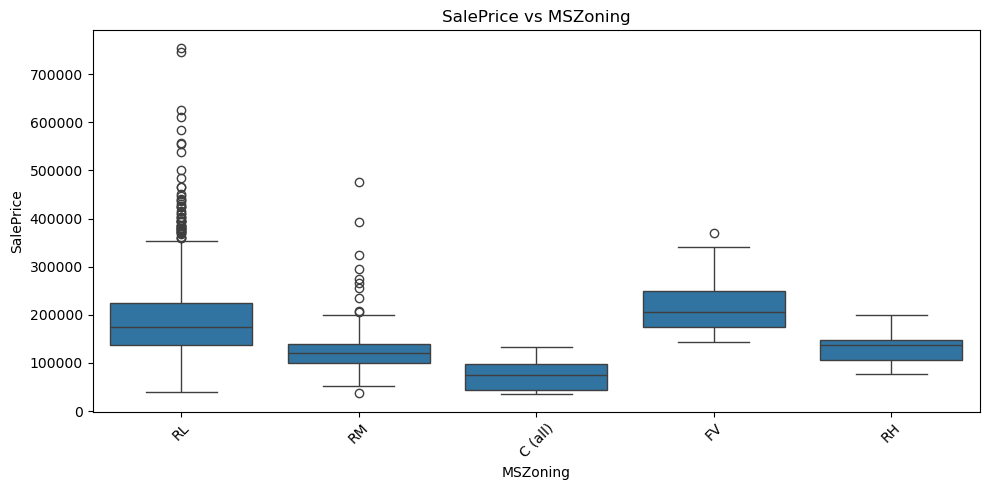

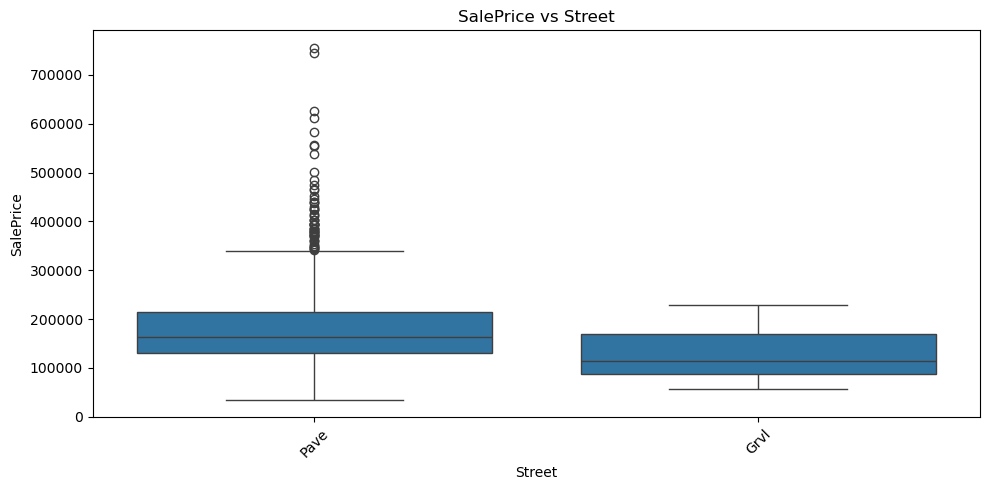

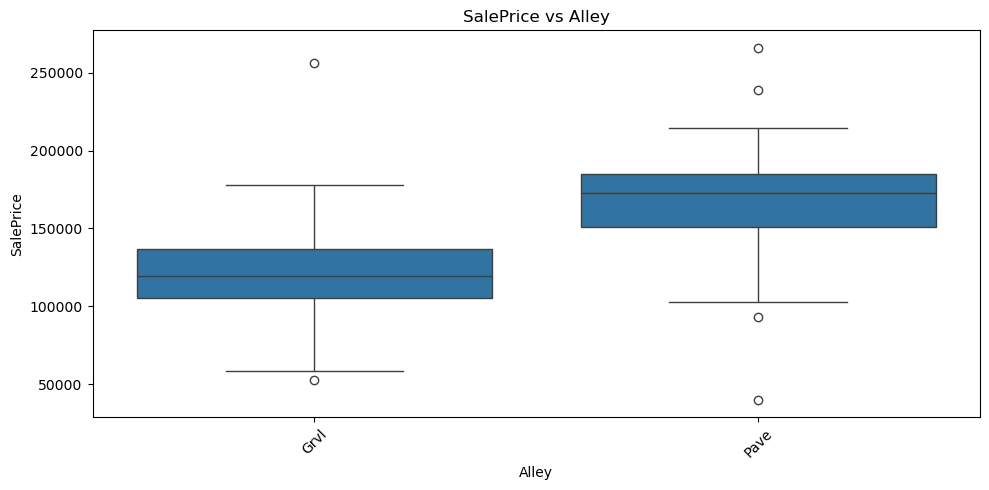

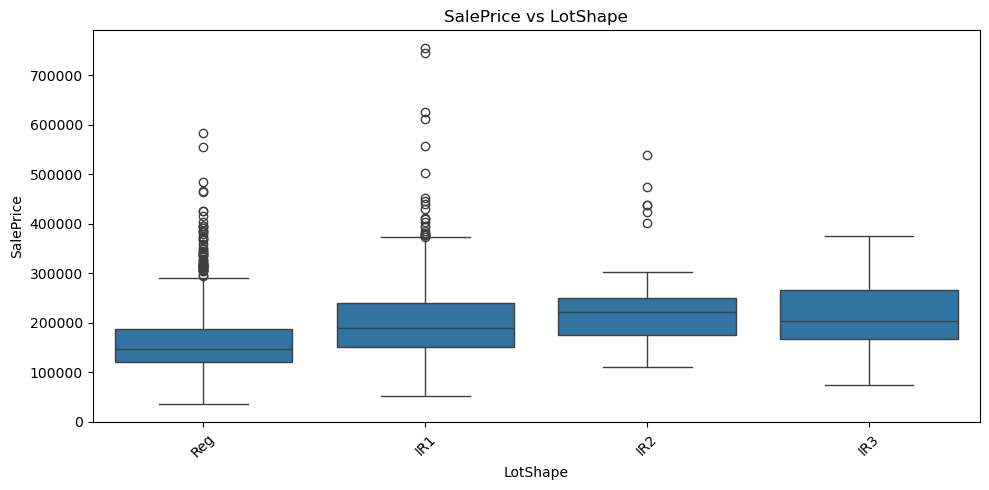

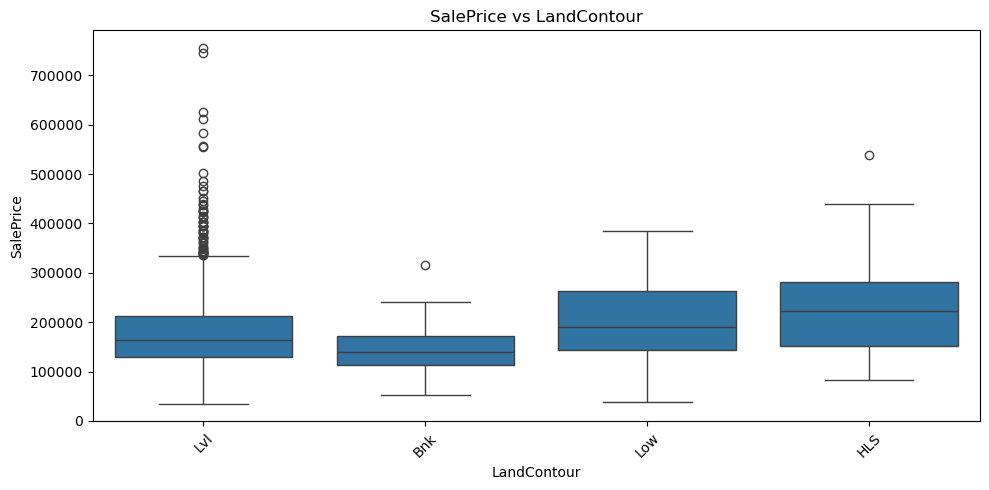

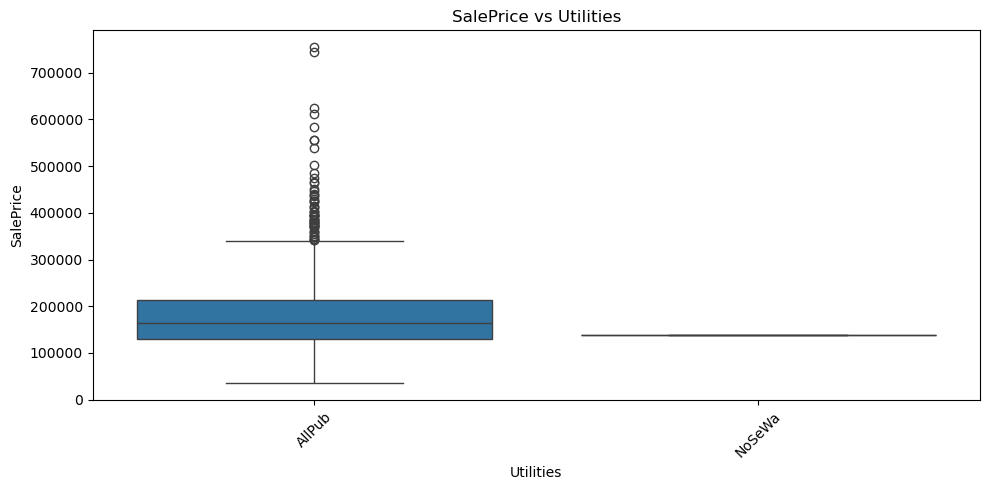

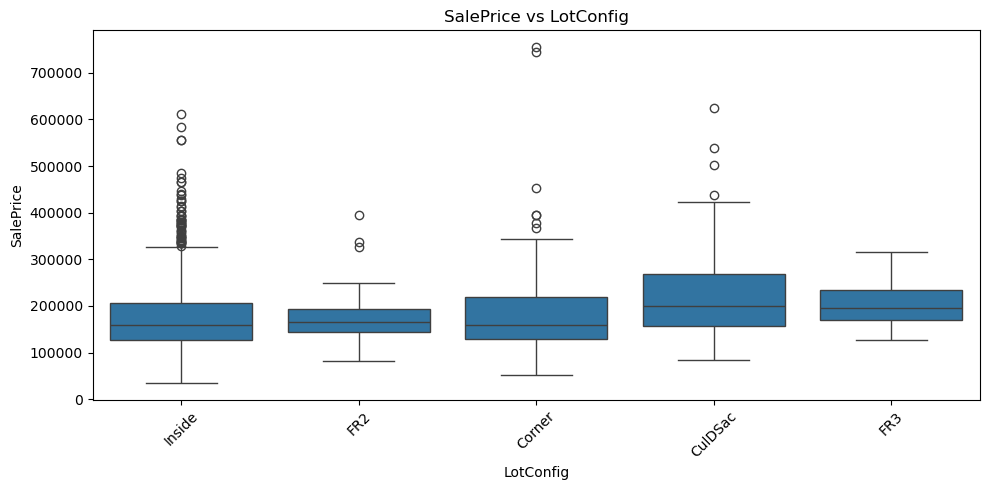

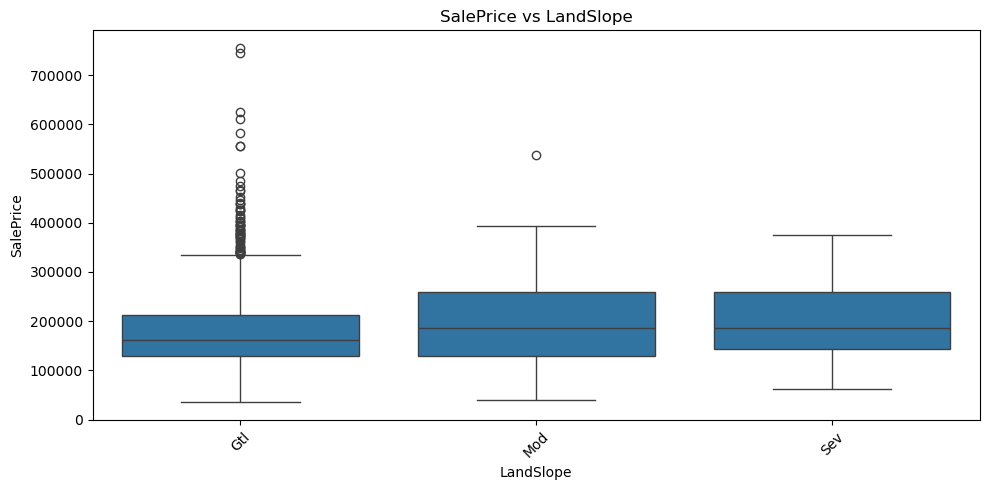

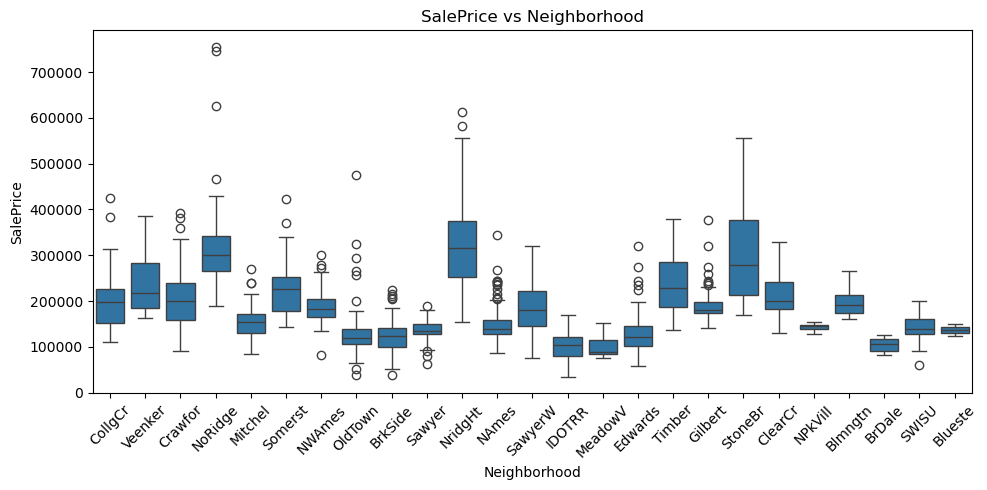

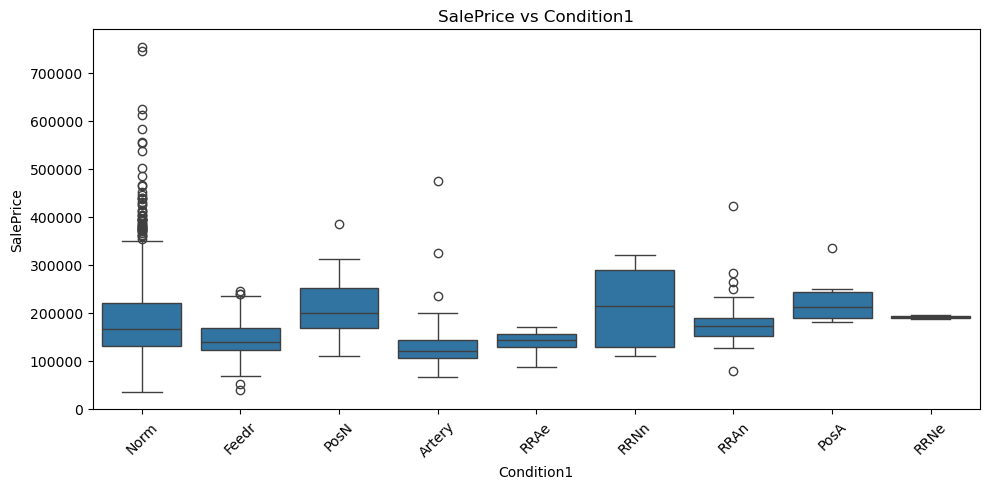

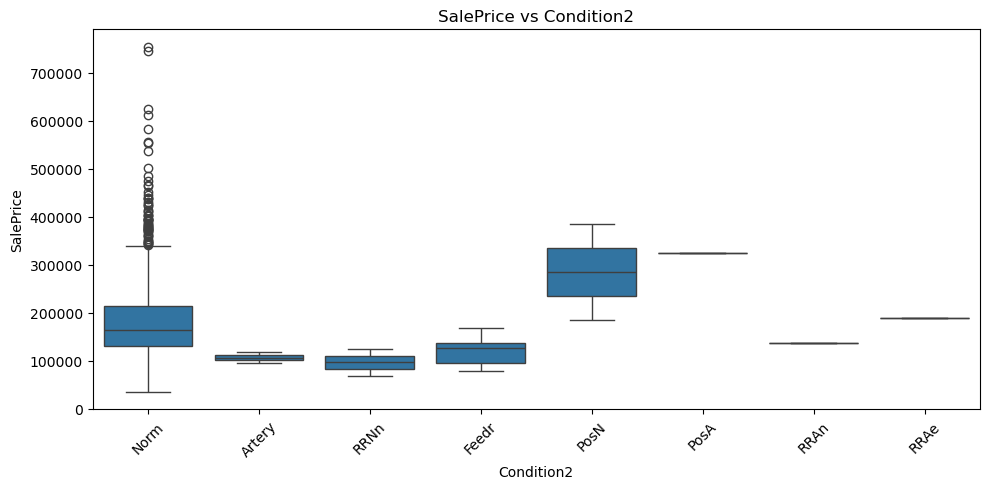

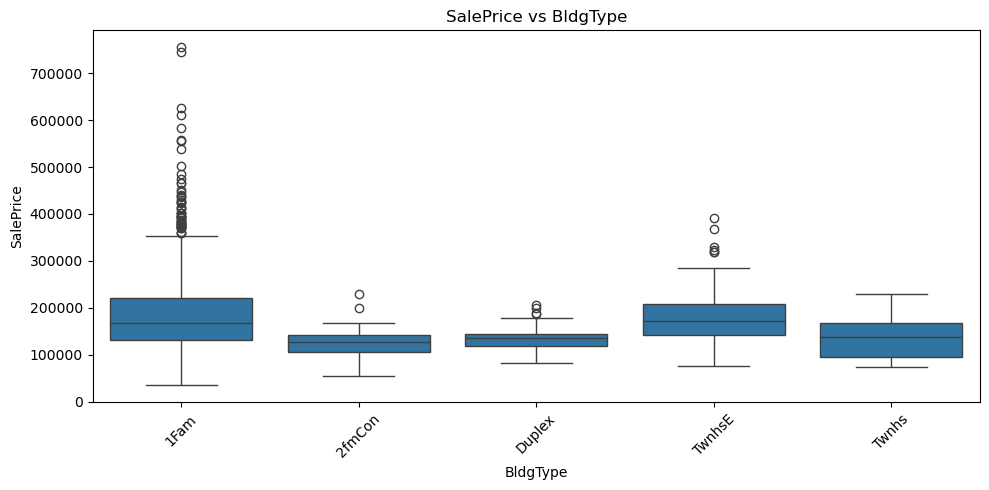

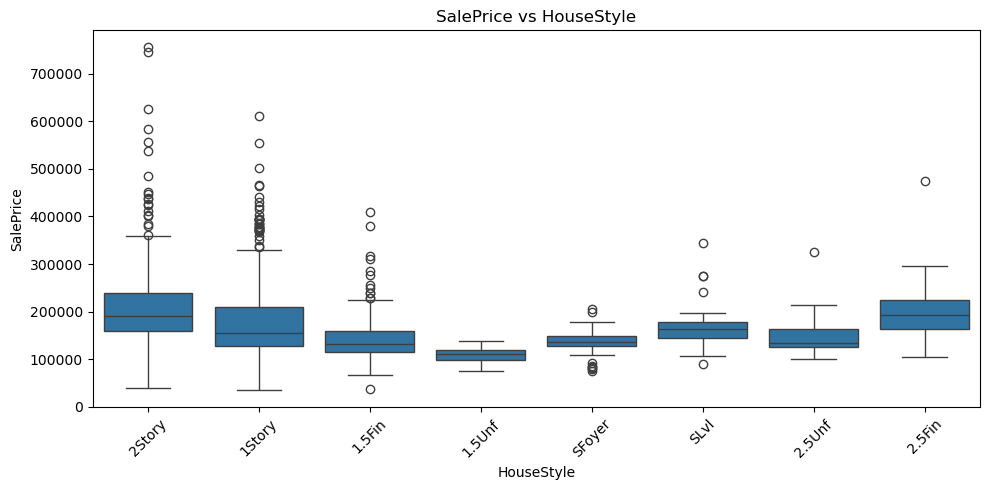

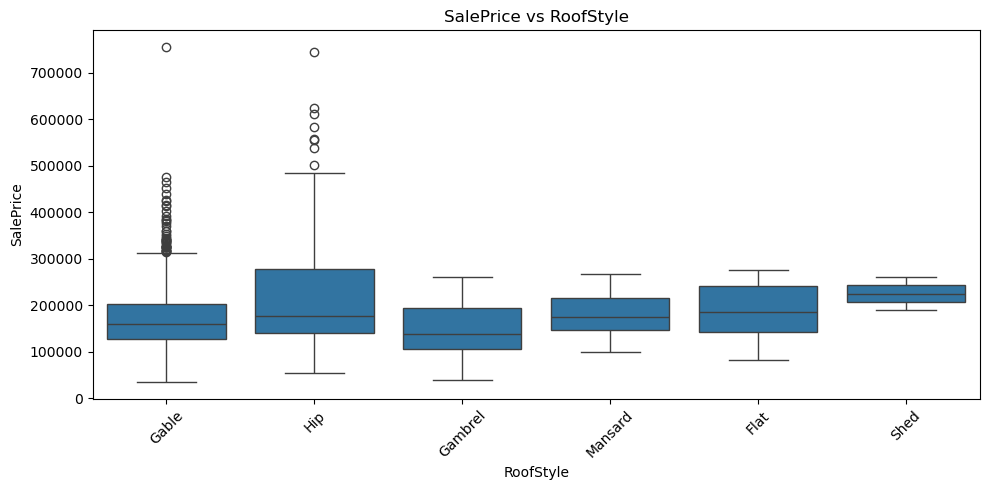

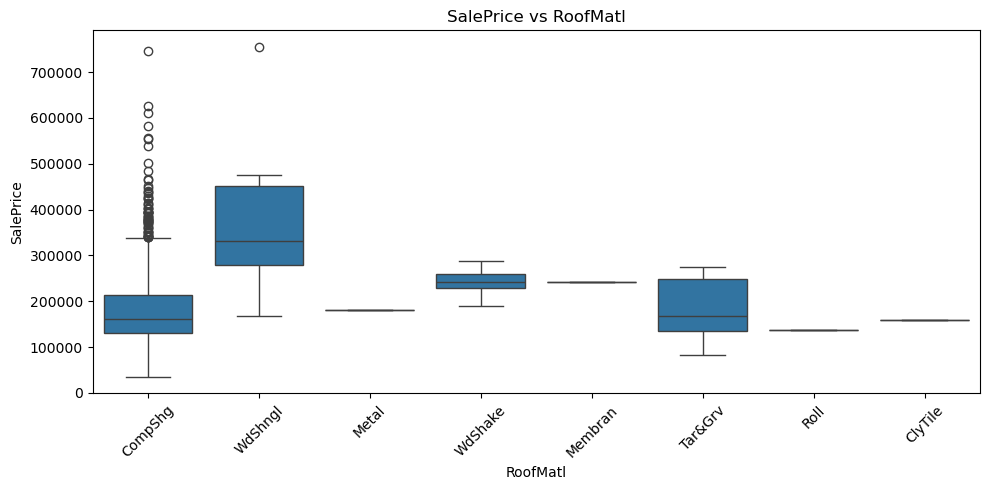

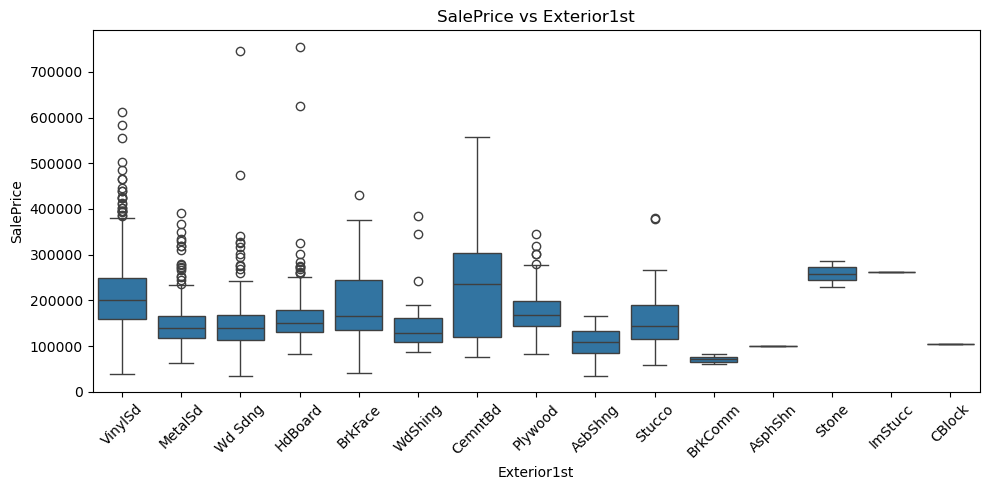

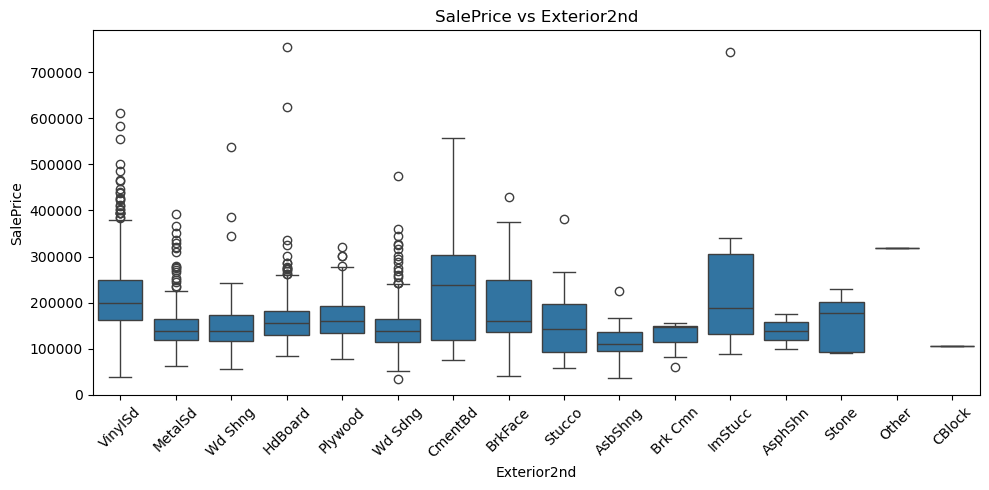

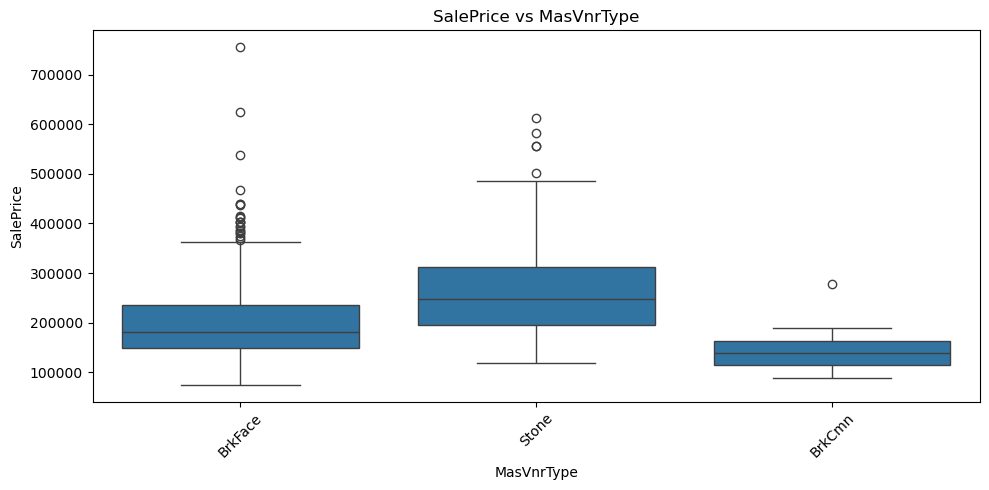

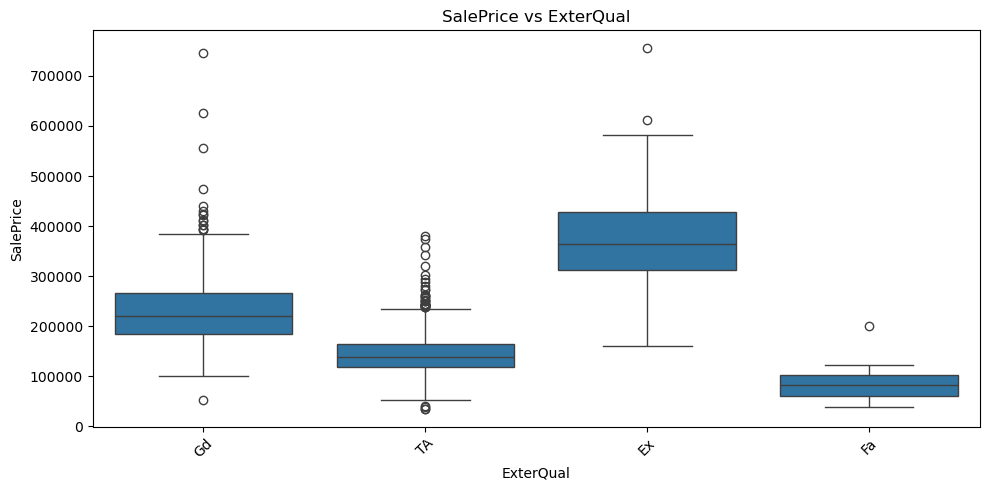

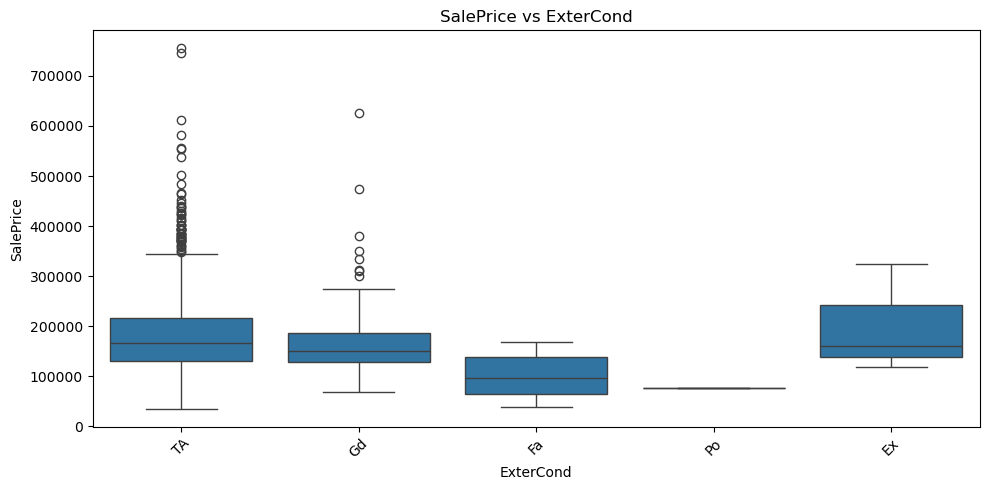

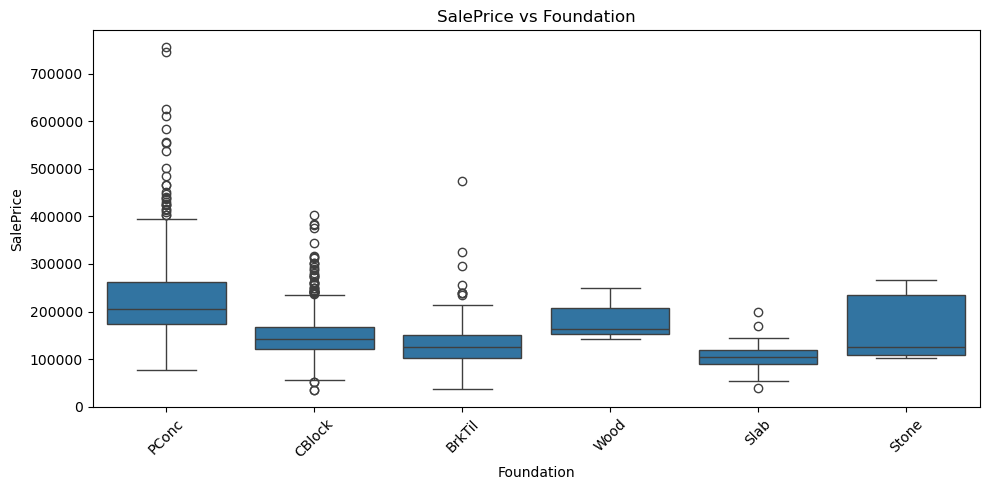

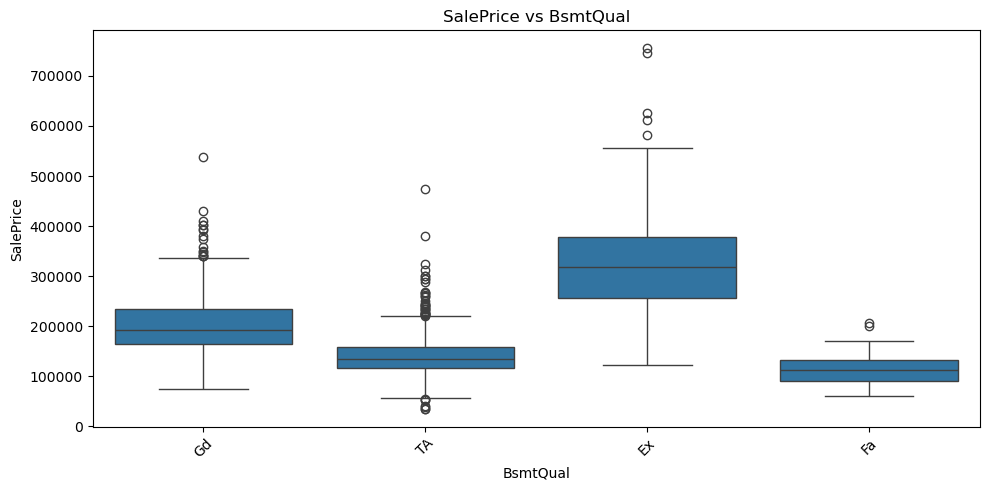

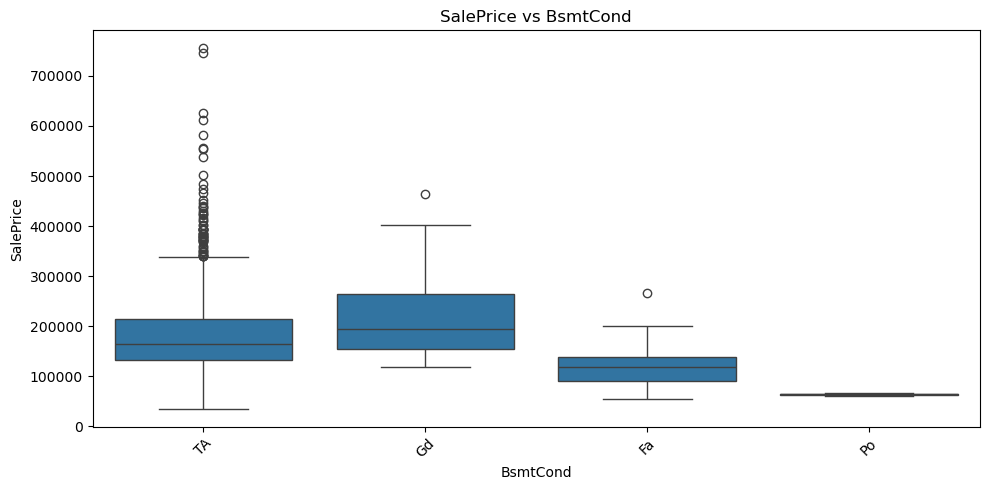

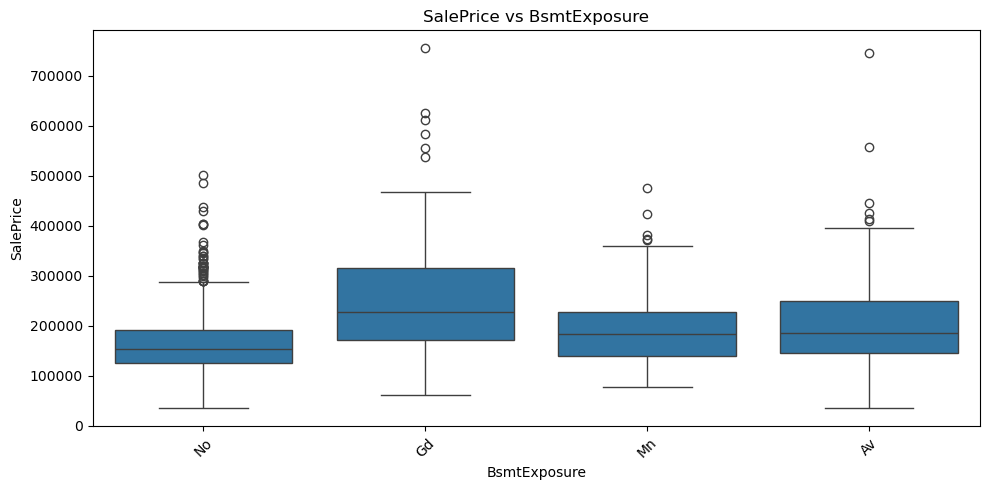

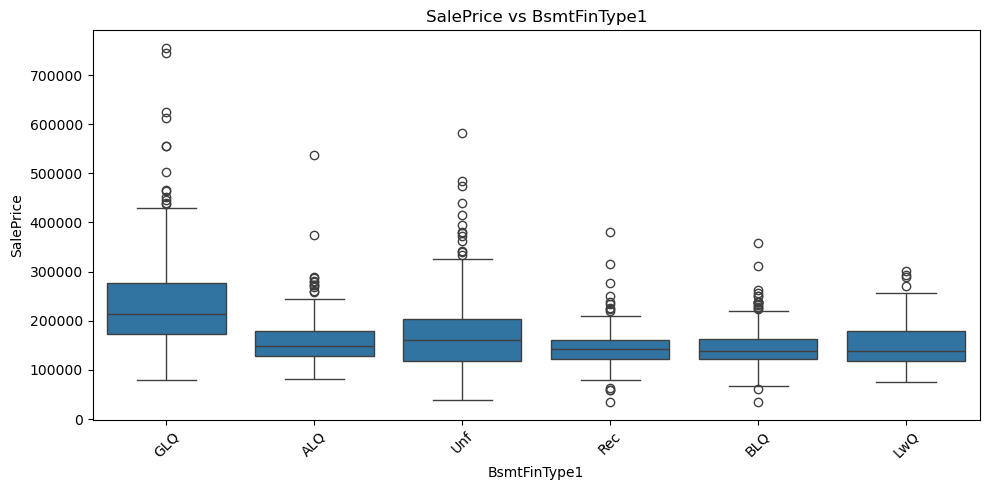

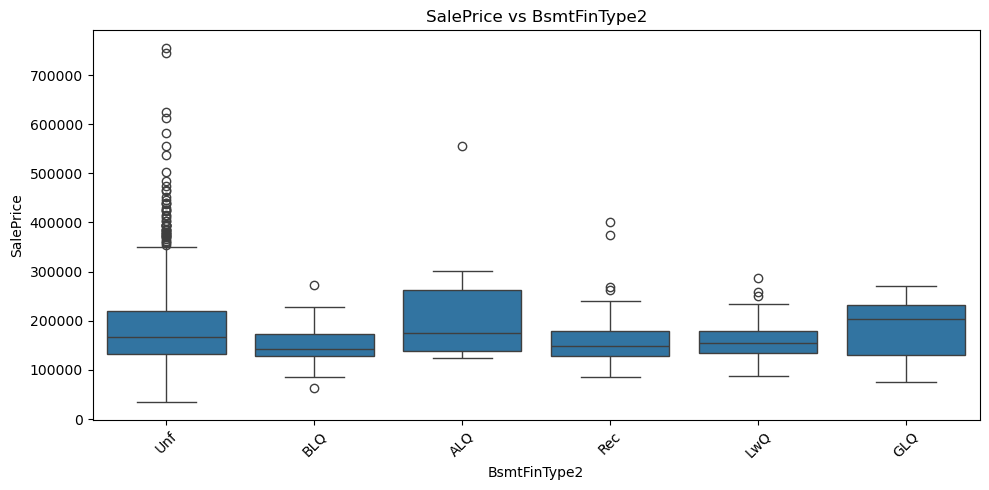

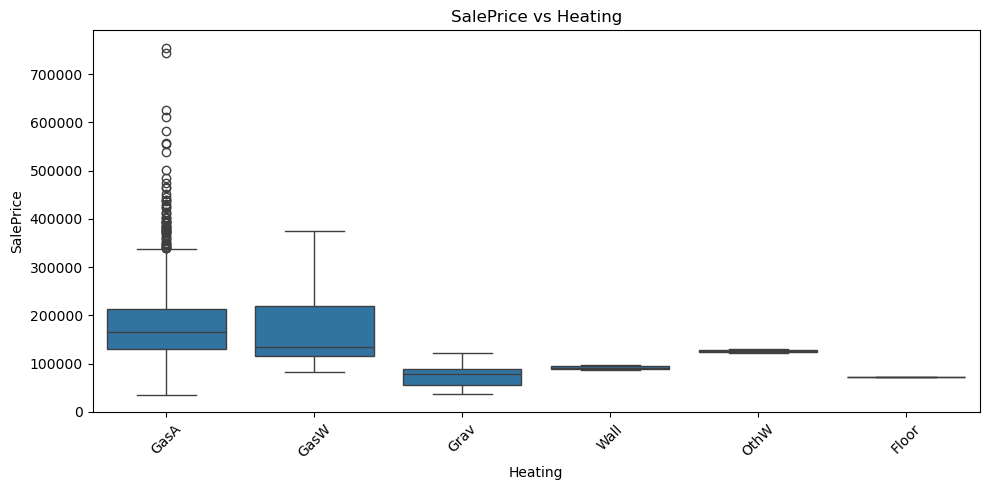

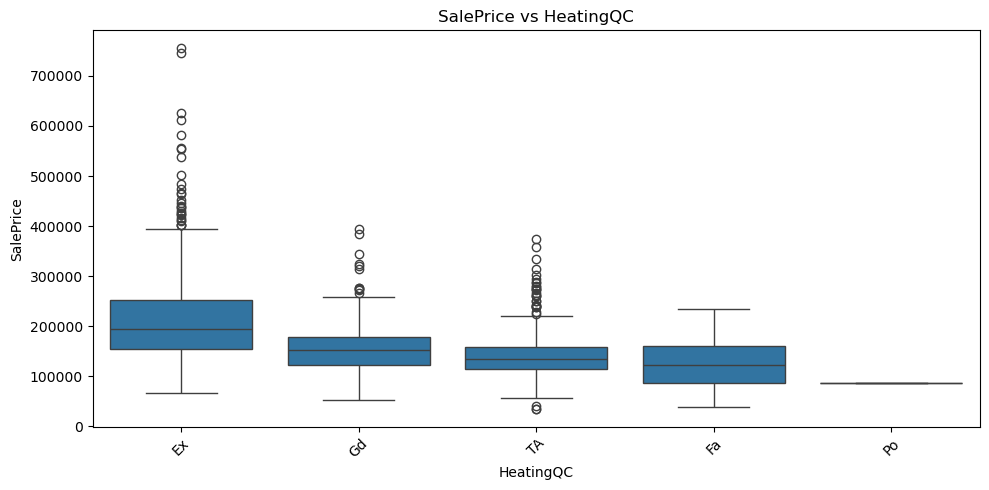

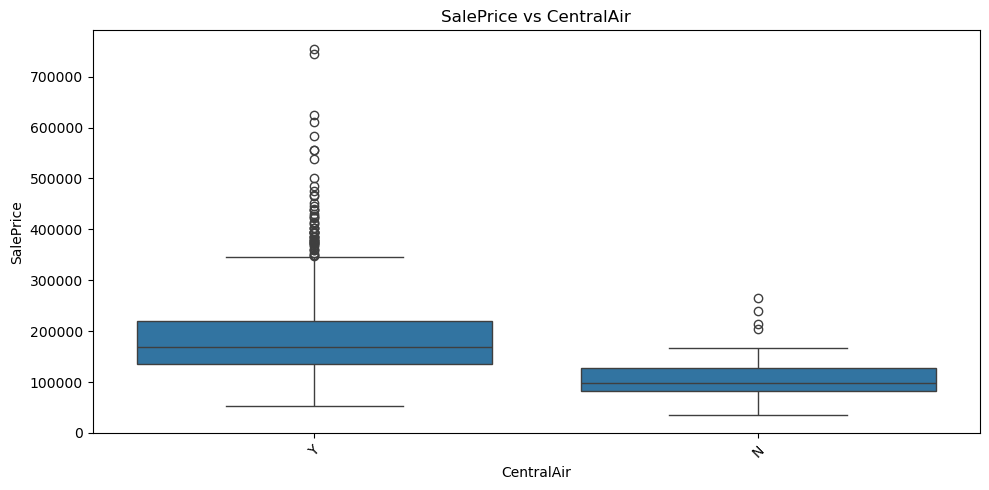

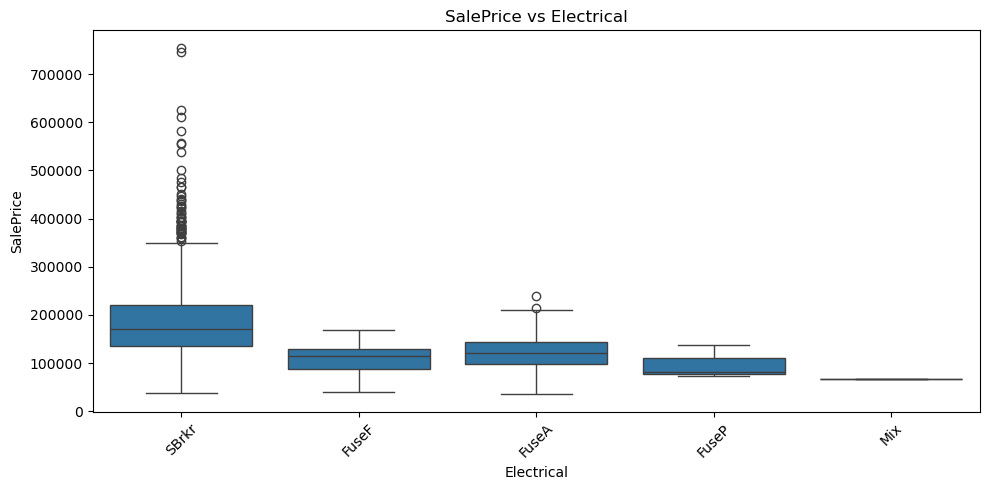

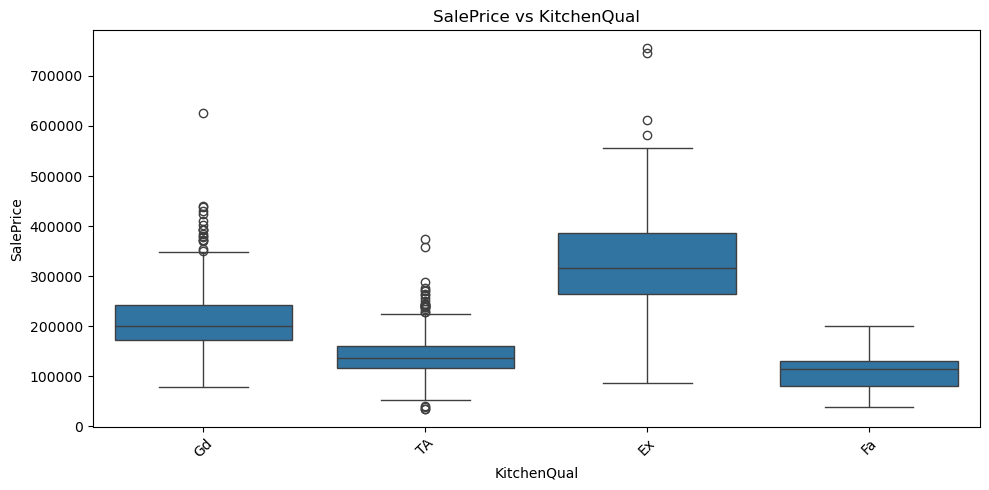

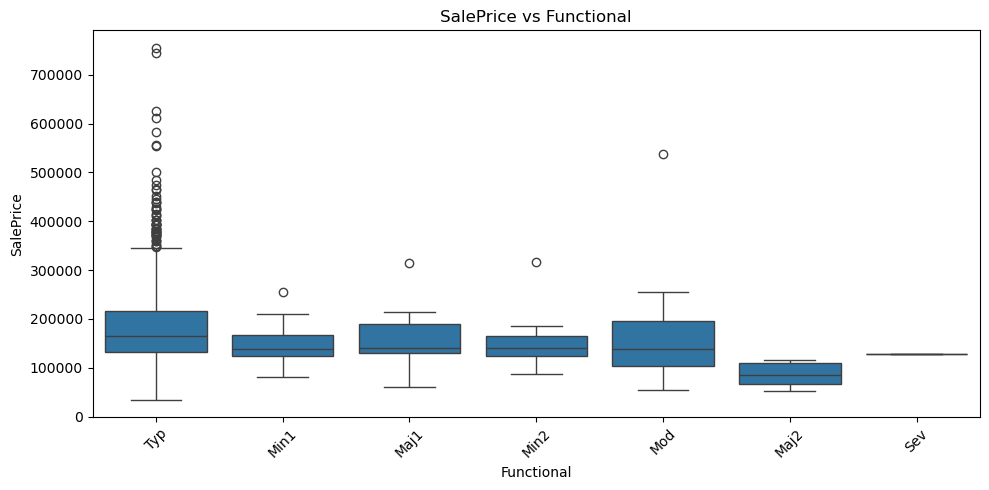

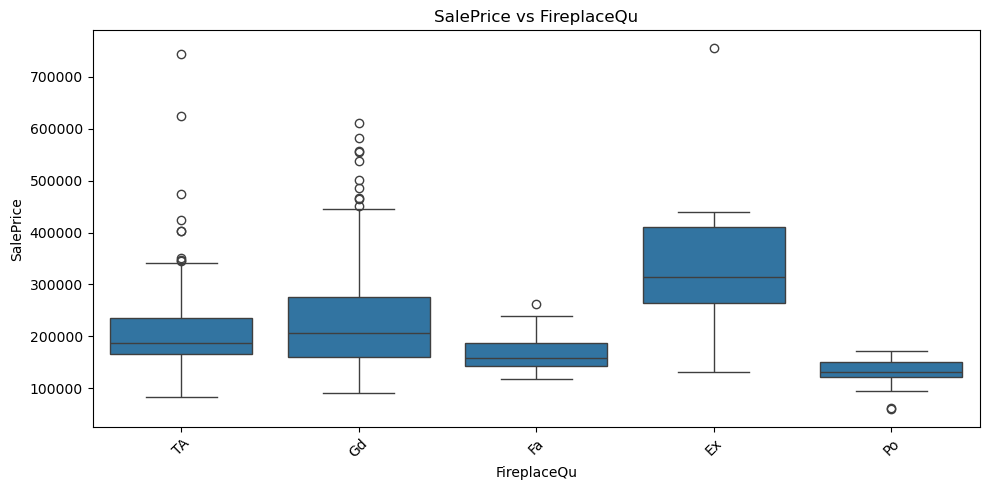

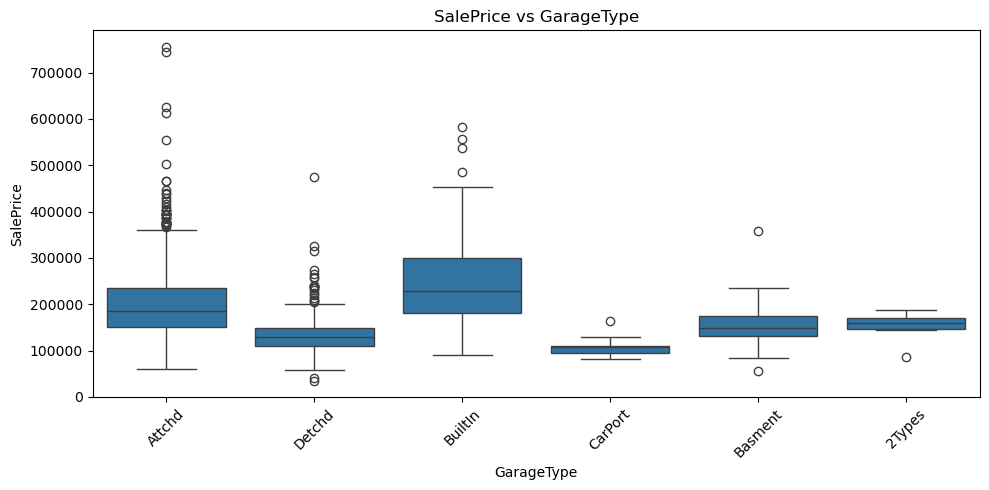

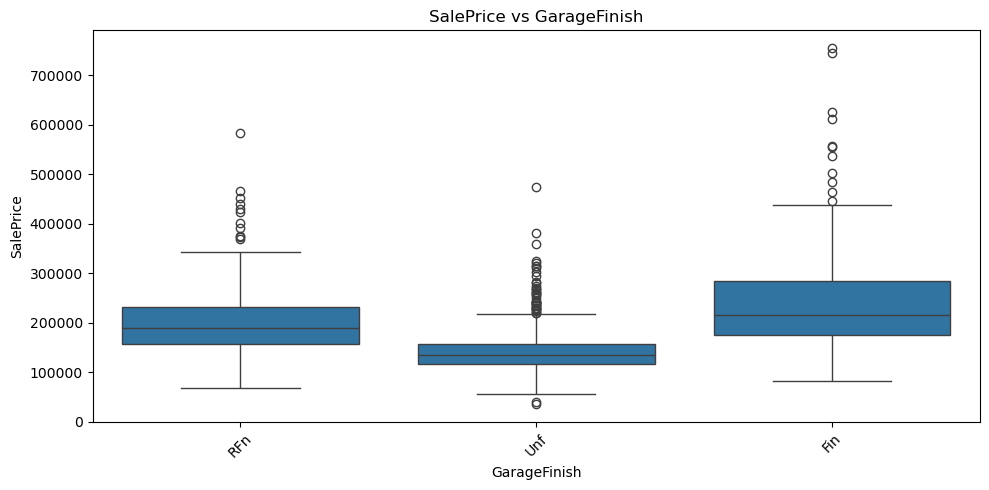

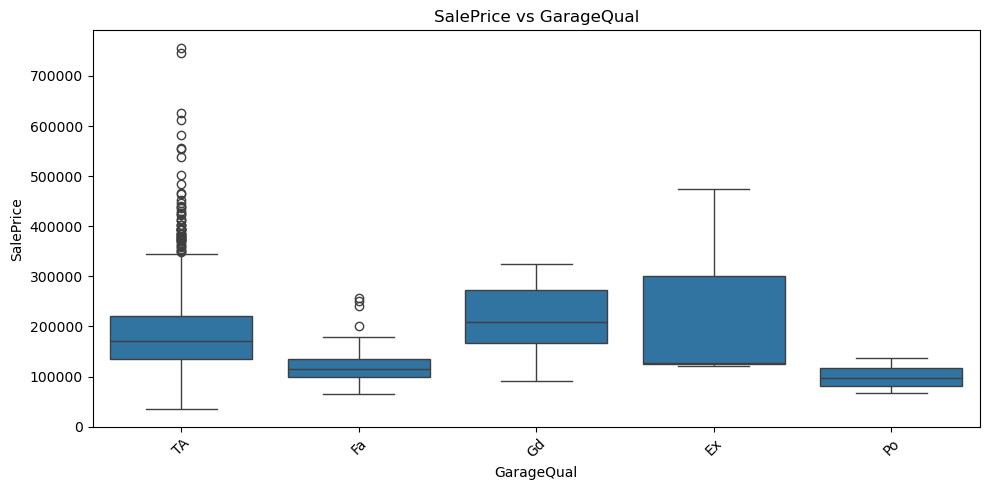

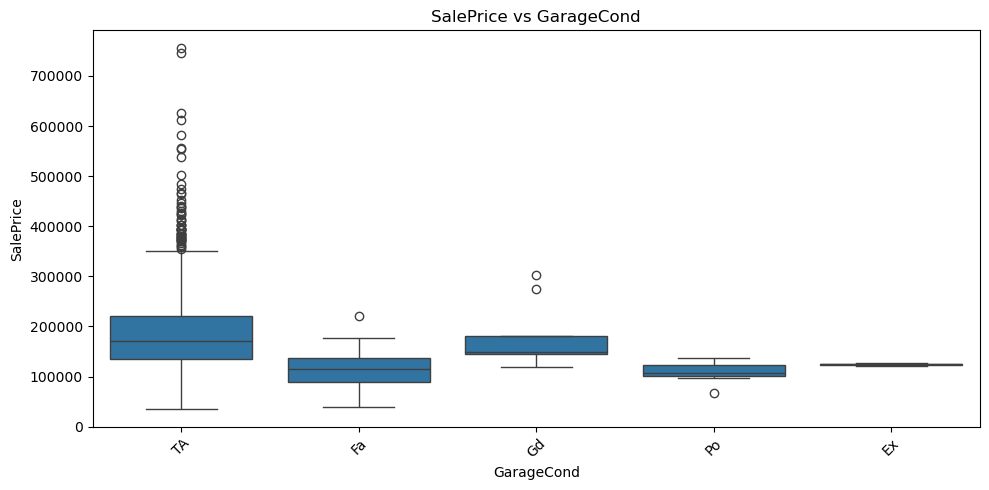

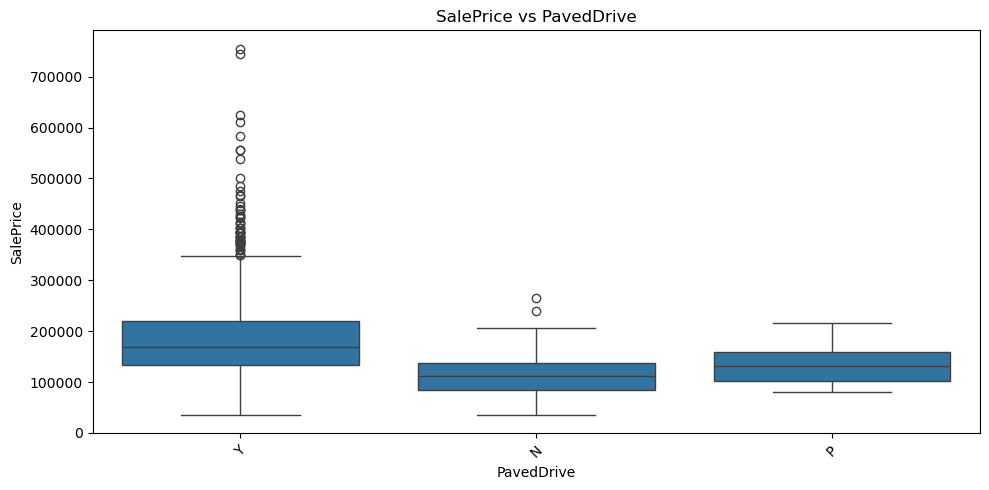

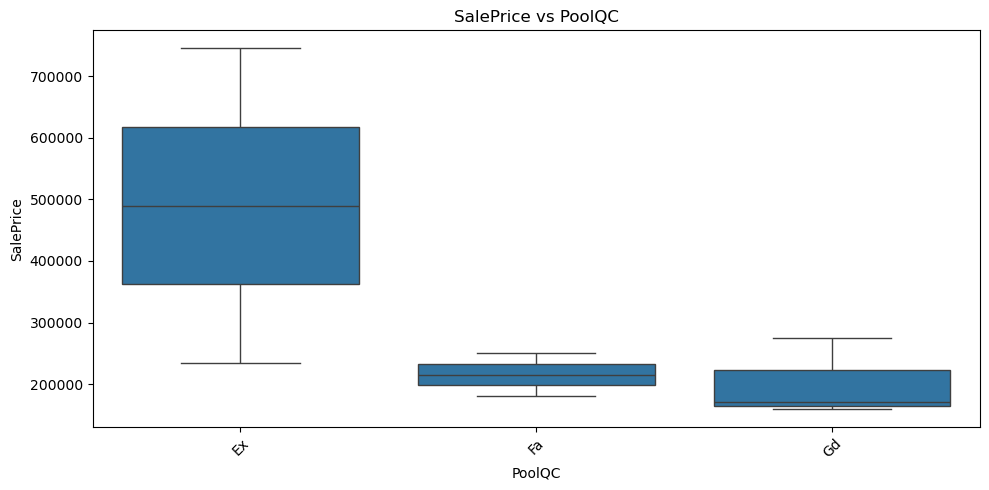

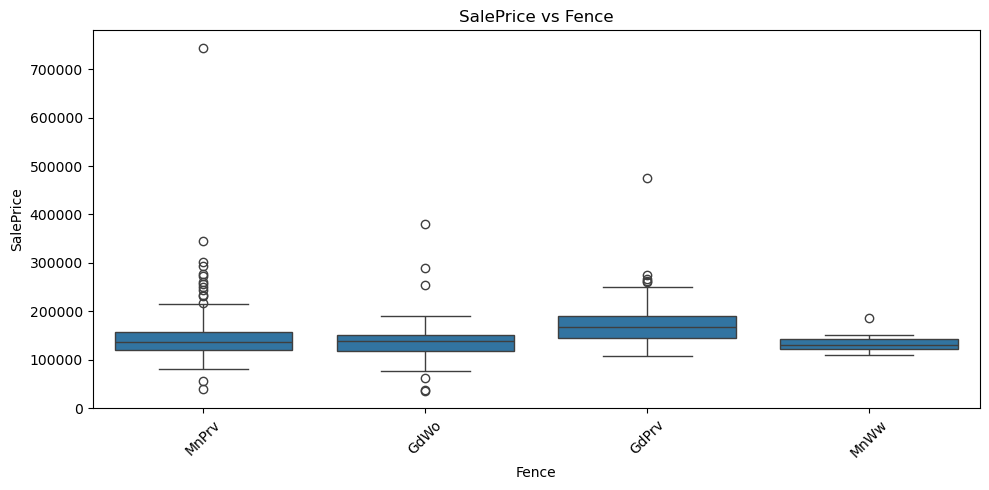

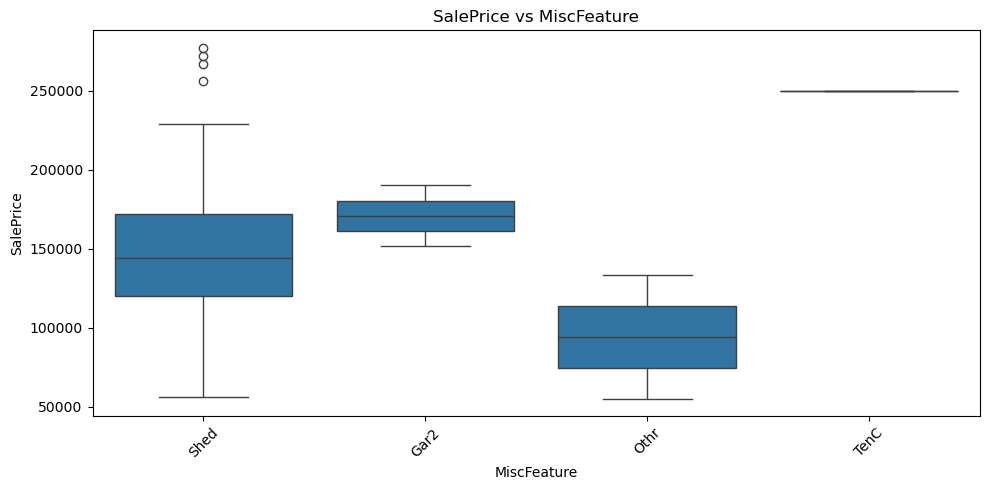

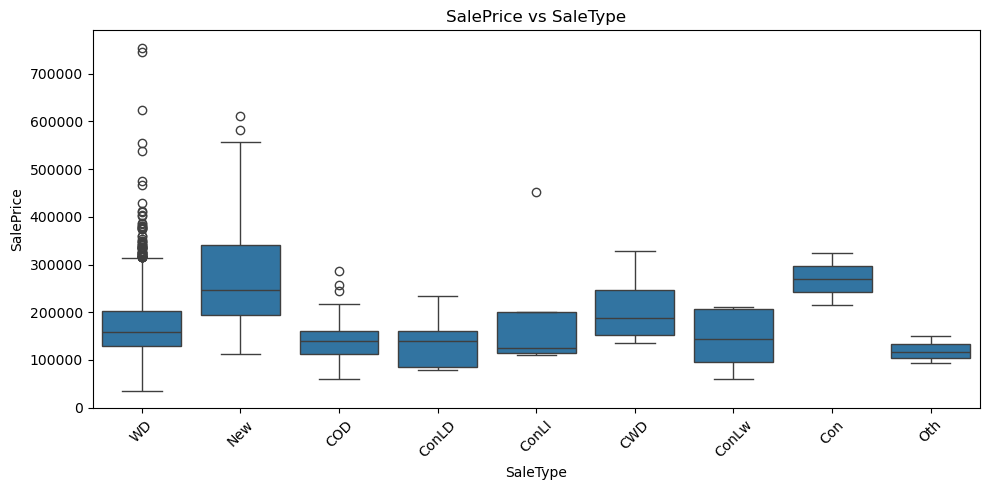

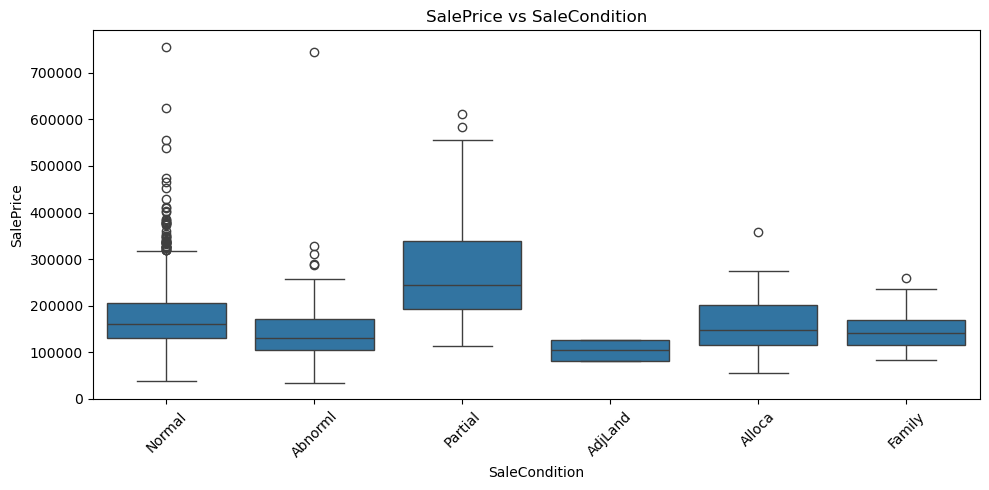

In [15]:
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y='SalePrice', data=df_train)
    plt.xticks(rotation=45)
    plt.title(f'SalePrice vs {col}')
    plt.tight_layout()
    plt.show()


- Zones show that there is no data point for agriculture zone, while Residential (Low, Medium, High) Density [RL, RM, RH] have skewed data and are around the 10 thousand to 25 thousand sale price. Commercial zone have very low sale price and Floating village residential being not easy to access is priced around 25 thousand. There are outliers in RL and RM means that certain houses probably with more area are priced higher because of less density of houses.
- Paved road access have outliers because its expensive to construct as comapred to Gravel, similarly that's why Paved Street houses are priced higher than Gravel Street.
- Paved alley access is priced higher than gravelled alley access because of cost of construction and convenience.
- LotShape refers to shape of property, regular shaped have outliers probably when its area is big. Others have irregular shape yet are generally priced higher than regular because of irregualr property shape means larger area.
- Sloped land contour can increase value for views but also raise building expenses, while flat land is cheaper to develop but may lack views, and complex contours impact engineering, utility planning, and flood risk assessments.
- Almost all house have all public utilities, and priced around 10,000 to 20,000; some have Electricity, Gas, and Water only.
- LotConfig and LandSlope have evenly distributed categories with houses priced around 10,000 to 25,000
- NorthRidge, NorthRidgeHeights, StoneBrook and Timberland are the neighbourhoods with pricier houses
- Within 200' of North-South Railroad, ear positive off-site feature--park, greenbelt, etc, and Normal conditions to transport/features, due to accessibility houses are priced higher
- 1 story and 2 story houses are priced higher due to their larger area (vertically)
- wooden shingled and standard shingled roofs have higher priced houses due to its costly purchase & installation
- Vinyl sliding, cemented board and stucco houses are priced higher - cost of construction
- excellent quality external conditions have significant effect on prices
- poured concrete foundation with solid foundation and construction cost raises the house price
- Gas forced warm air furnace, GasW	Gas hot water or steam heat - provides centralized heating thus are in demand, so houses with these are priced higher
- Finished attached or built-in garage raises house prices
- Paved driveway and pools increase prices (additional facilities costs more)
- New houses and constructed and sold are the new way in and haven't been lived so are priced higher compared to those lived in

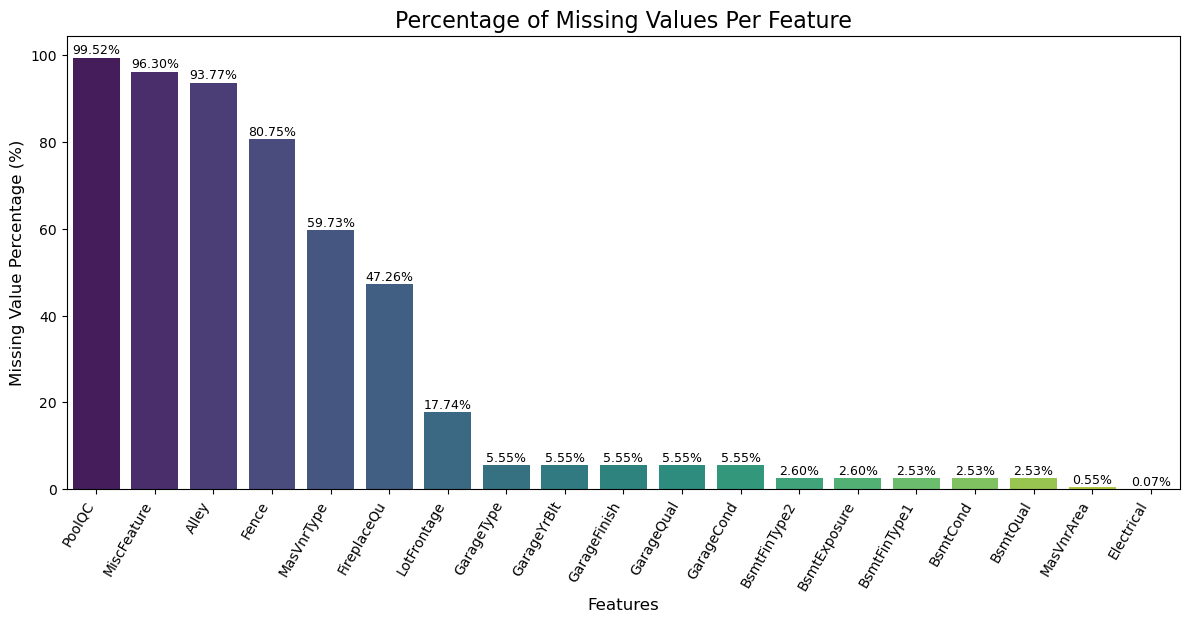

In [16]:
missing_values_to_plot = missing_values_percent[missing_values_percent > 0].sort_values(ascending=False)

if missing_values_to_plot.empty:
    print("No missing values found in the DataFrame.")
else:
    
    plt.figure(figsize=(12, max(6, len(missing_values_to_plot) / 3)))

    ax = sns.barplot(
        x=missing_values_to_plot.index, 
        y=missing_values_to_plot.values,
        hue=missing_values_to_plot.index,
        palette='viridis',
        legend=False 
    )

    ax.set_title('Percentage of Missing Values Per Feature', fontsize=16)
    ax.set_ylabel('Missing Value Percentage (%)', fontsize=12)
    ax.set_xlabel('Features', fontsize=12)

    plt.xticks(rotation=60, ha='right') 

    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.2f}%', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            fontsize=9, 
            color='black', 
            xytext=(0, 5), 
            textcoords='offset points'
        )

    plt.tight_layout()
    plt.show()

### Correlation Analysis

Correlation of numerical features with target variable

In [17]:
corr_with_target = df_train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
corr_with_target

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<font size="3">

**Visualizing the correlation of numerical features with a heatmap**

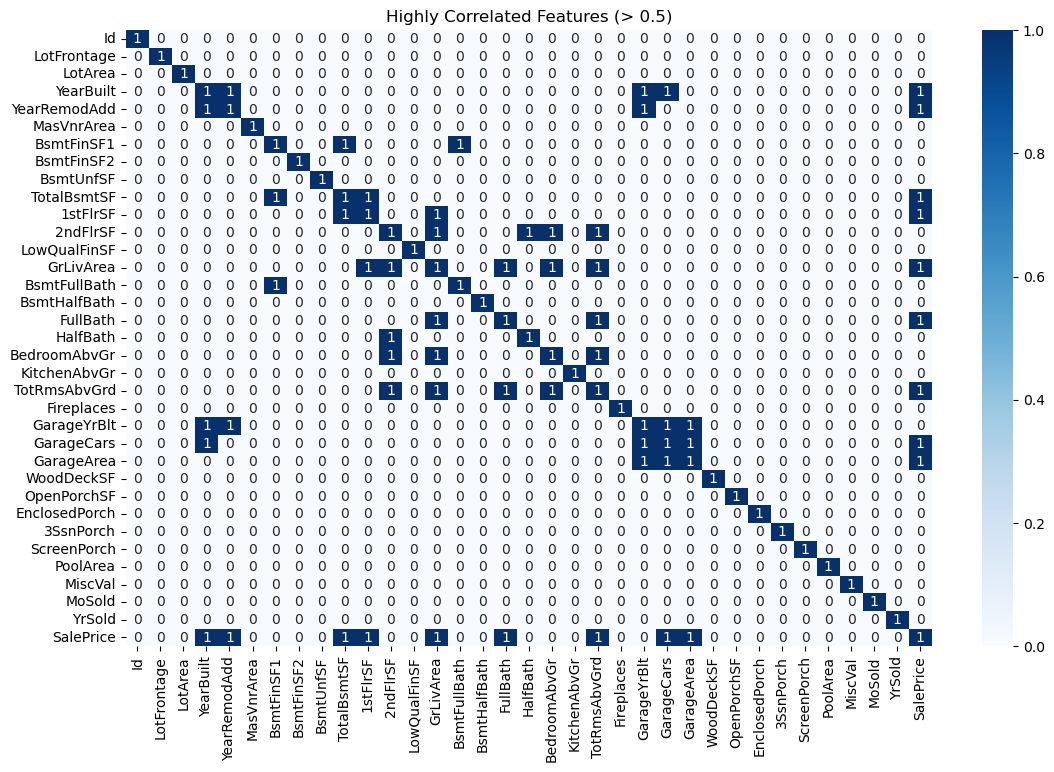

In [18]:
plt.figure(figsize=(13, 8))
sns.heatmap(df_train.corr(numeric_only=True).abs() > 0.5, annot=True, cmap='Blues')
plt.title("Highly Correlated Features (> 0.5)")
plt.show()

- **Sale Price** has correlation with **YearBuilt, YearRemodAdd, TotalBasmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea**
>> => price is related with age of house, renovation year, basement area, 1st floor area, ground floor area, bathrooms, total rooms , how many cars can come in the garage, garage area => area of house, condition of house and facilities it can provide
- YearBuilt and Year Remodelled are correlated with each other
- Garage Year Built is correlated with YearBuilt, Year Remodelled, garage cars and garage area
- Basement bathroom is correlated with basement finished area
- Total rooms is correlated with 2nd floor area, ground living area, bathroom, bedroom
- bedroom is correlated with basement bathroom, total rooms, 2nd floor area
- basement finished area is correlated with total basement area, basement bathroom

In [19]:
threshold = 0.1
low_corr_cols = corr_with_target[abs(corr_with_target) < threshold].index
low_corr_cols

Index(['PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold'],
      dtype='object')

### Distribution Plot using KDE for continuous variables

<Figure size 600x400 with 0 Axes>

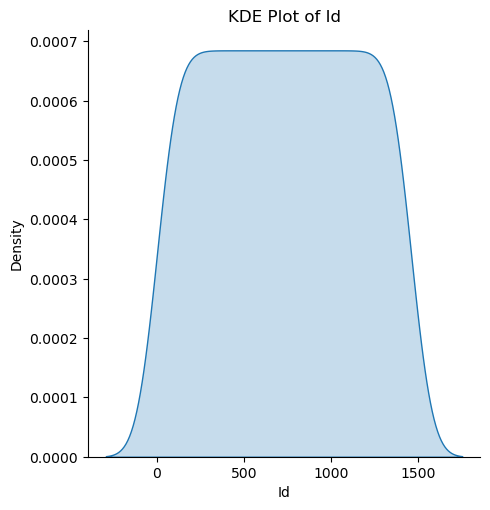

<Figure size 600x400 with 0 Axes>

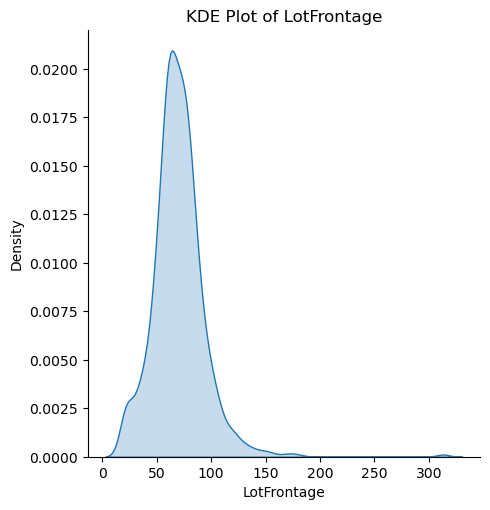

<Figure size 600x400 with 0 Axes>

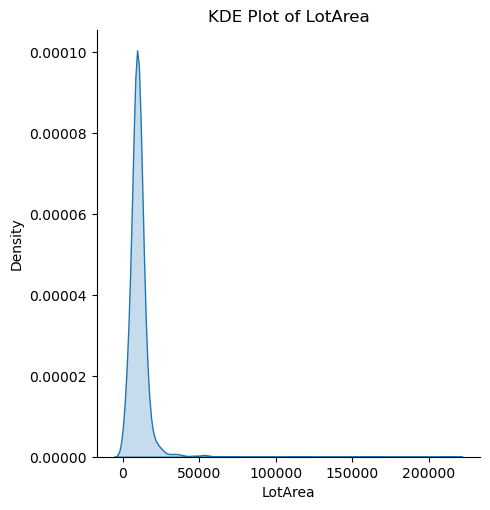

<Figure size 600x400 with 0 Axes>

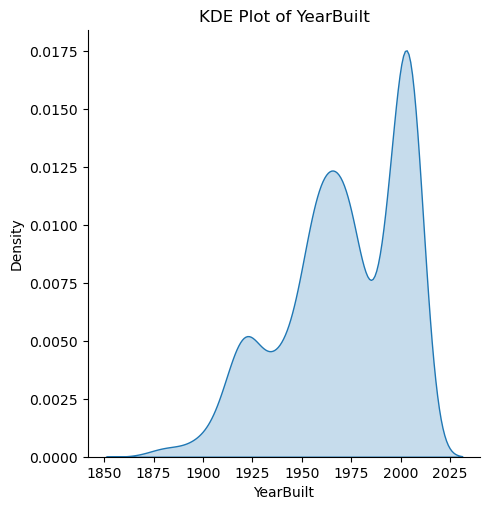

<Figure size 600x400 with 0 Axes>

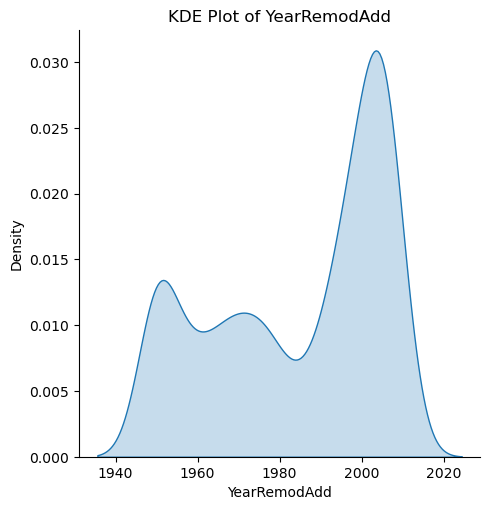

<Figure size 600x400 with 0 Axes>

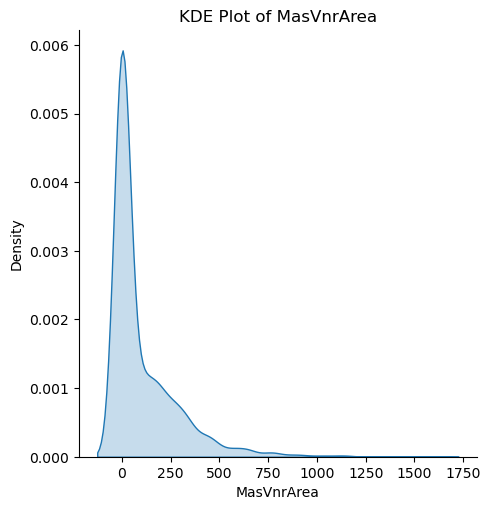

<Figure size 600x400 with 0 Axes>

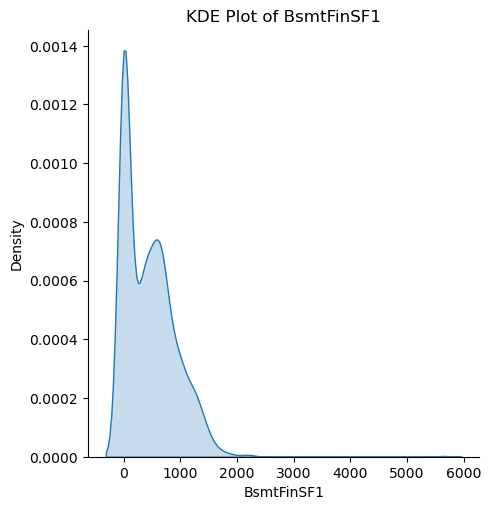

<Figure size 600x400 with 0 Axes>

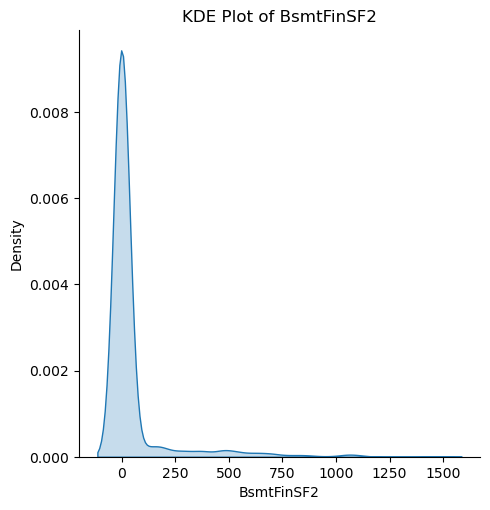

<Figure size 600x400 with 0 Axes>

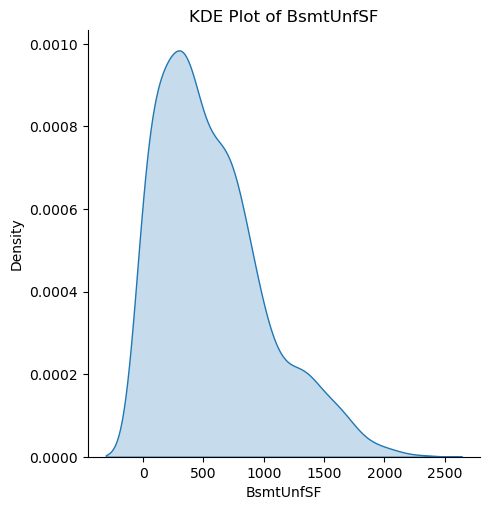

<Figure size 600x400 with 0 Axes>

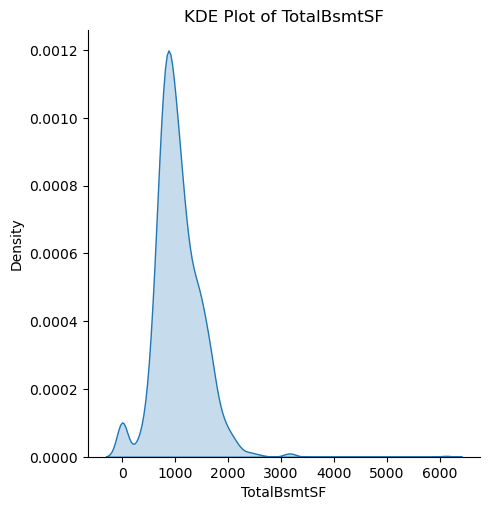

<Figure size 600x400 with 0 Axes>

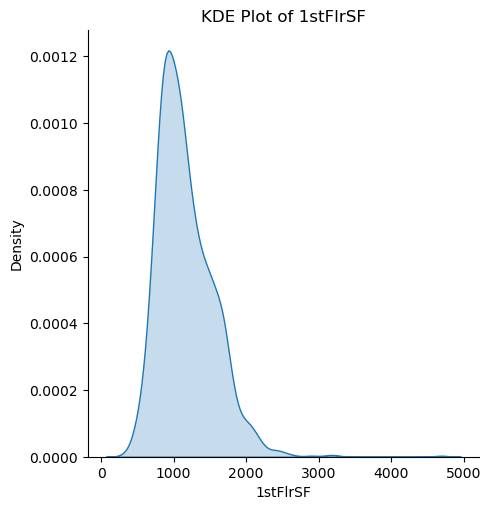

<Figure size 600x400 with 0 Axes>

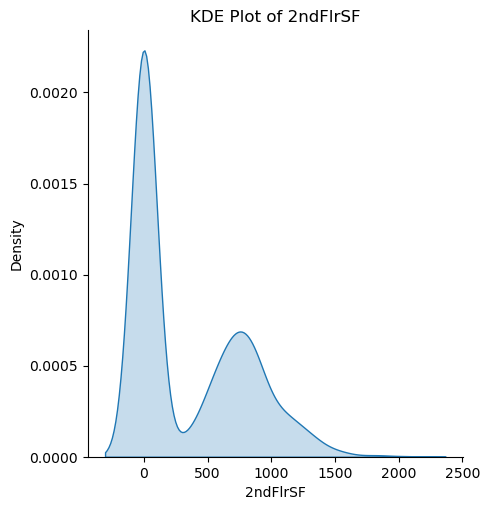

<Figure size 600x400 with 0 Axes>

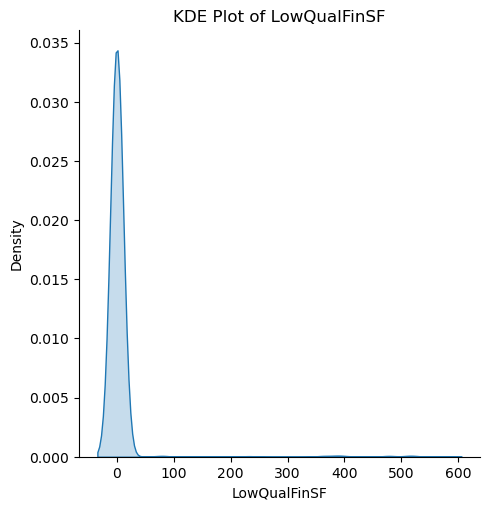

<Figure size 600x400 with 0 Axes>

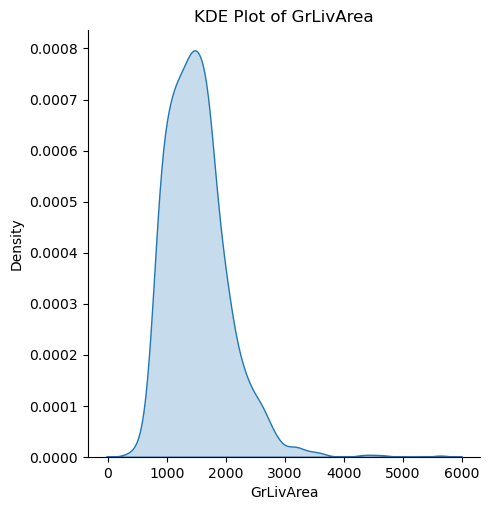

<Figure size 600x400 with 0 Axes>

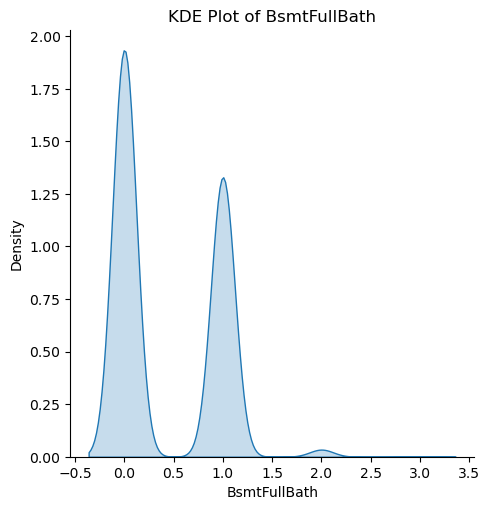

<Figure size 600x400 with 0 Axes>

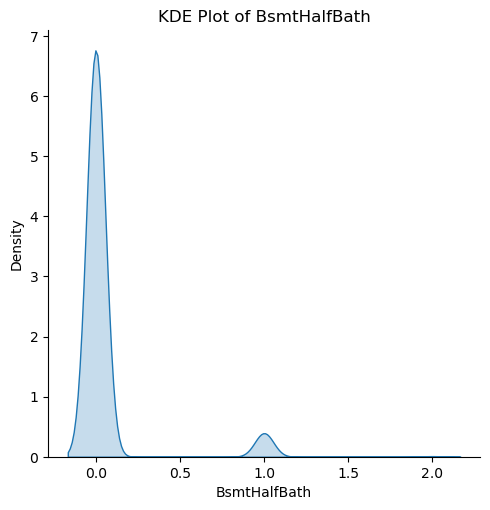

<Figure size 600x400 with 0 Axes>

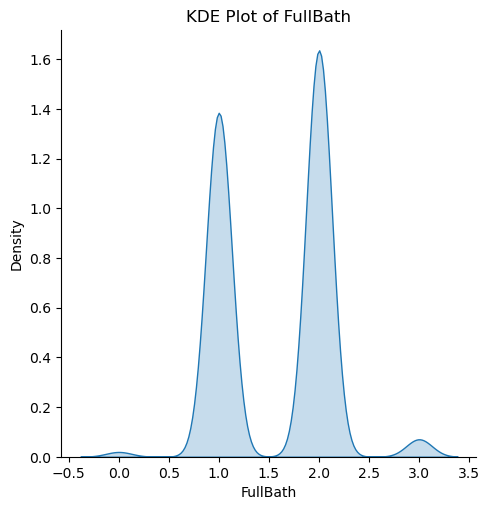

<Figure size 600x400 with 0 Axes>

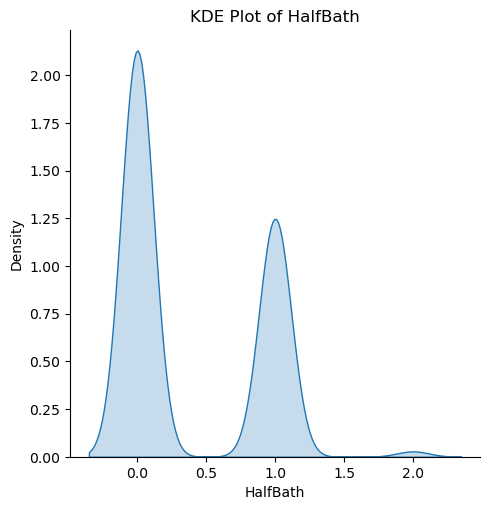

<Figure size 600x400 with 0 Axes>

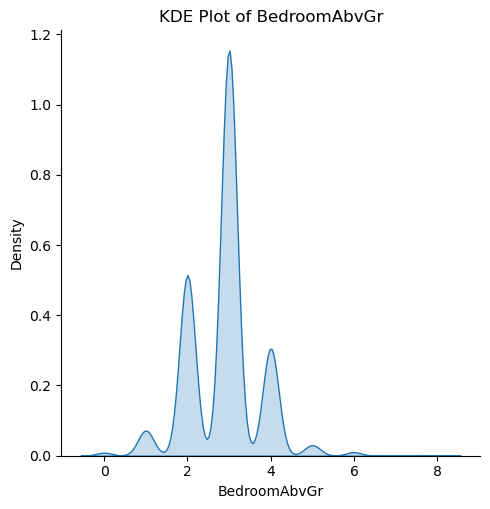

<Figure size 600x400 with 0 Axes>

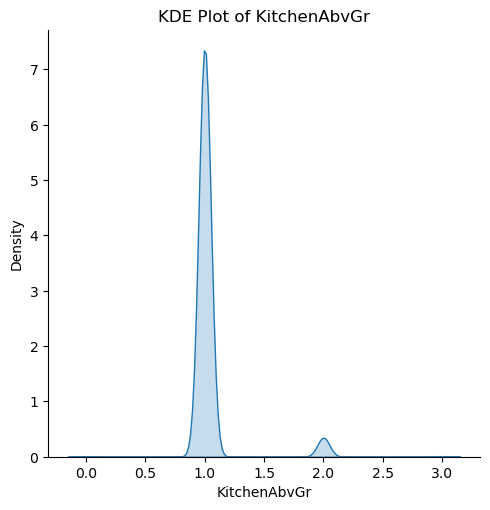

<Figure size 600x400 with 0 Axes>

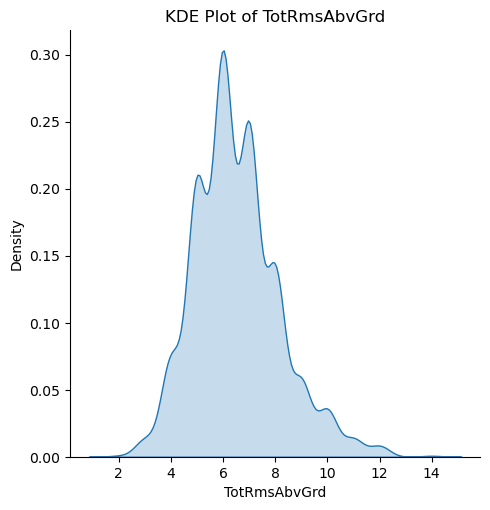

<Figure size 600x400 with 0 Axes>

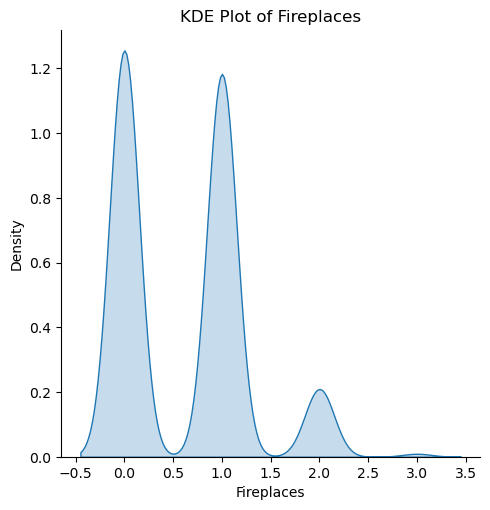

<Figure size 600x400 with 0 Axes>

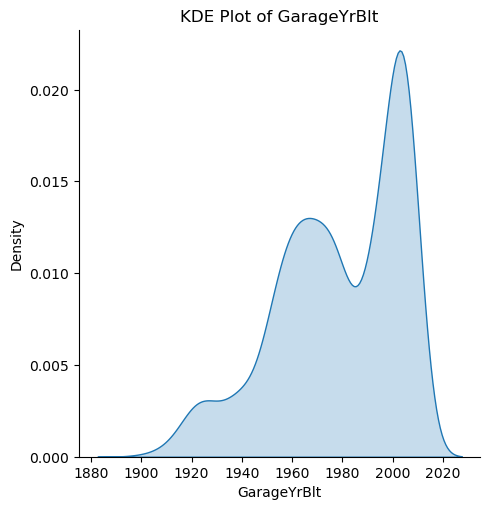

<Figure size 600x400 with 0 Axes>

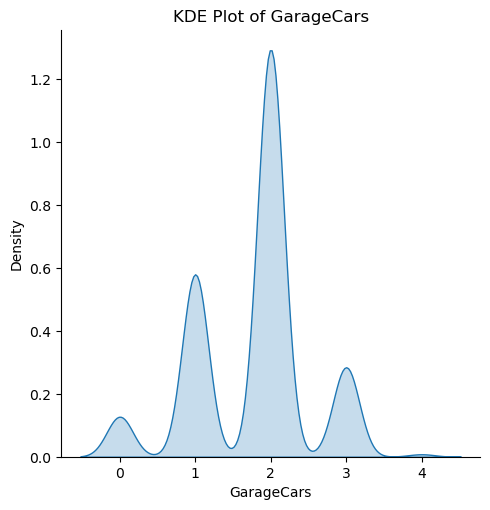

<Figure size 600x400 with 0 Axes>

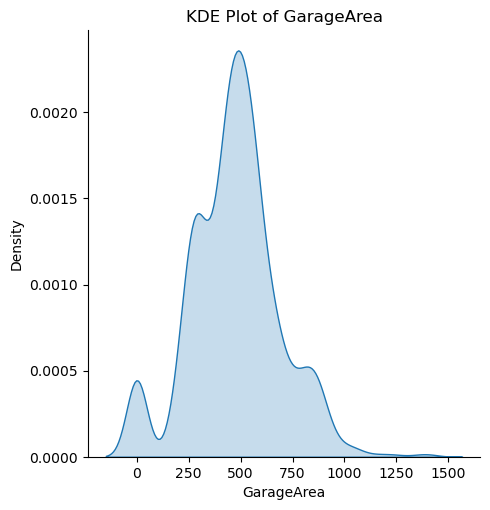

<Figure size 600x400 with 0 Axes>

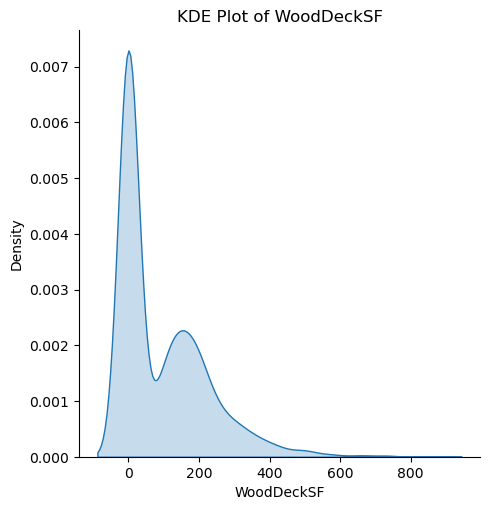

<Figure size 600x400 with 0 Axes>

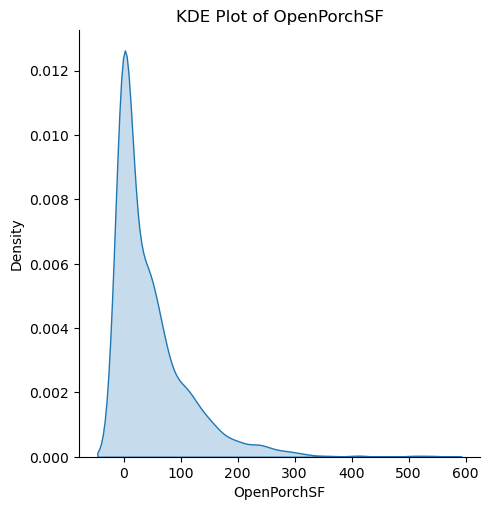

<Figure size 600x400 with 0 Axes>

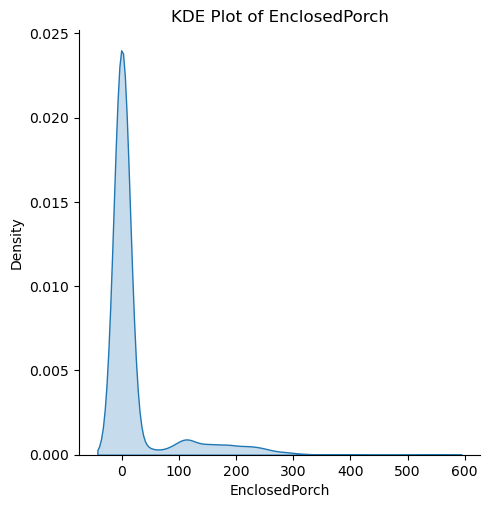

<Figure size 600x400 with 0 Axes>

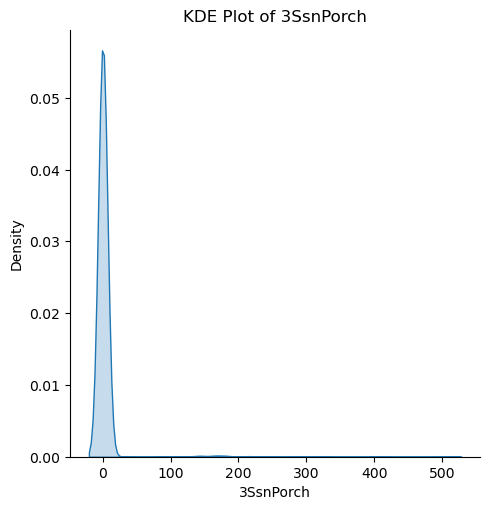

<Figure size 600x400 with 0 Axes>

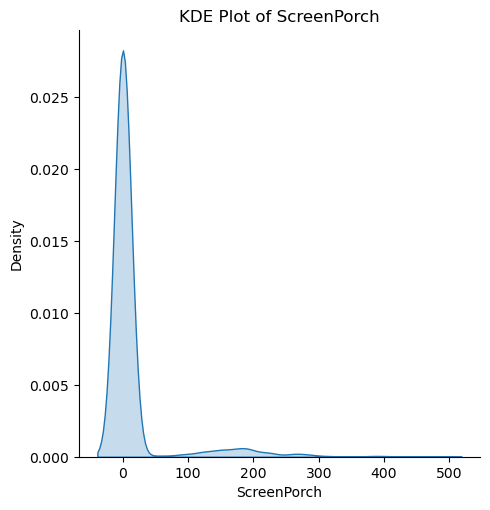

<Figure size 600x400 with 0 Axes>

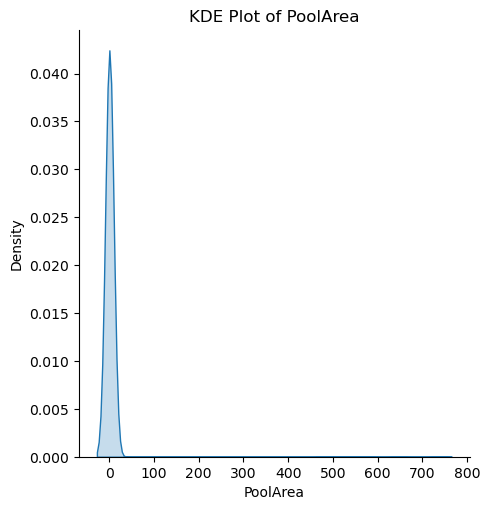

<Figure size 600x400 with 0 Axes>

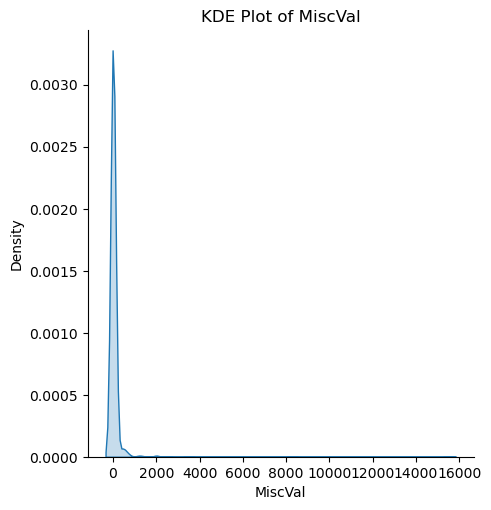

<Figure size 600x400 with 0 Axes>

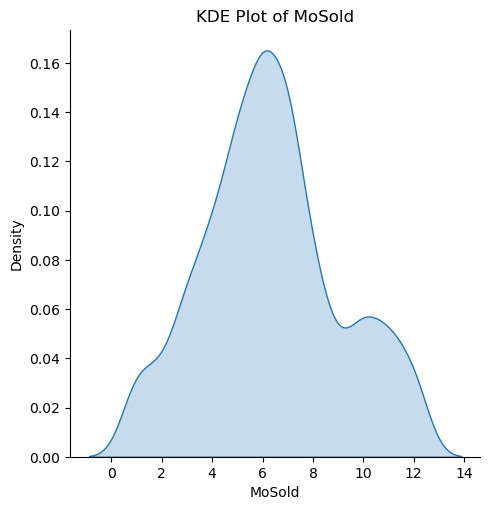

<Figure size 600x400 with 0 Axes>

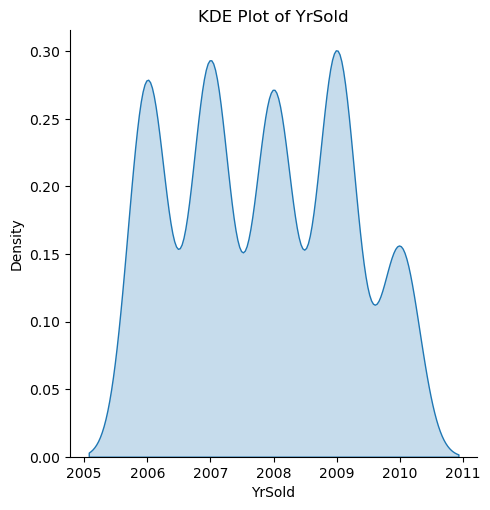

<Figure size 600x400 with 0 Axes>

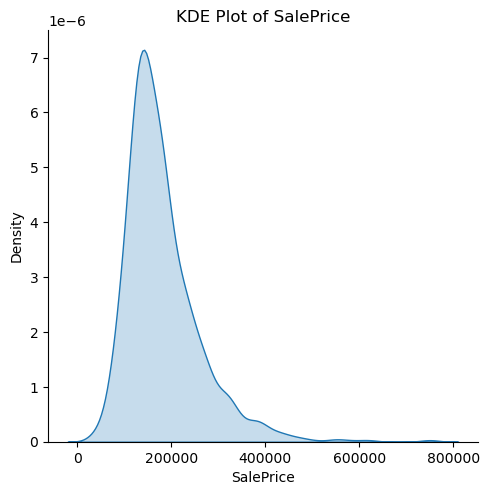

In [20]:
# KDE plot
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.displot(data=df_train, x=df_train[col], kind='kde', fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.show()

- KDE plot of **LotFrontage, LotArea, MasVnrType, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtS, 1stFlrSF, 2ndFlrSF, LowQualFinSF, WoodDeckSF, OpenPorchSF, SalePrice** are right skewed.

## Data Cleaning

- Drop features
- fill missing values
- change data types
- handle outliers

In [21]:
# creating another dataframe in which we will drop variables, this helps in comparison if needed with original dataset

df_train_temp = df_train.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','PoolArea','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF'])


Irrelevant features - ID  
Features with high percent of missing values - PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu  
There is another variable with 40 % missing values - LotFrontage, but it has some correlation with target so not dropping it.  
Weak Correlated features = 'PoolArea','3SsnPorch','BsmtFinSF2', 'BsmtHalfBath', 'MiscVal','LowQualFinSF'  
    these features don't have any relation with target variable and so have no significant impact on it.

<font size="3">

**Filling Missing Values**

For numeric value - used median  
For categorical value - used mode

In [22]:
# Identify numeric and categorical
categ_cols = df_train_temp.select_dtypes(include=['object', 'bool']).columns
numer_cols = df_train_temp.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values
for col in numer_cols:
    df_train_temp[col].fillna(df_train_temp[col].median(), inplace=True)
for col in categ_cols:
    df_train_temp[col].fillna(df_train_temp[col].mode()[0], inplace=True)

print("Shape before:", df_train.shape)
print("Shape after:", df_train_temp.shape)

Shape before: (1460, 81)
Shape after: (1460, 68)


checking for any missing value that might have been left

In [23]:
missing_values1 = df_train_temp.isnull().sum()
missing_values1 = missing_values1[missing_values1>0].sort_values(ascending=False)
print(missing_values1)

Series([], dtype: int64)


In [24]:
# changing the big dataframe name to simple more usable name
df = df_train_temp

<font size="3">

**Changing data types**

Selecting all float data type columns and checking it for whole number values using numpy and printing those column names

In [25]:
float_cols = df.select_dtypes(include=['float']).columns

int_like_cols = [col for col in float_cols if np.allclose(df[col].dropna(), df[col].dropna().round())]

print(" Float columns that contain only whole numbers (can be safely converted to int):")
print(int_like_cols)

 Float columns that contain only whole numbers (can be safely converted to int):
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


Changing these columns' data type to integer.  
Integer data type values are discrete values and float data types that are not whole numbers might represent continuity.

In [26]:
df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']] = df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].astype('int64')

<font size="3">

**Outlier Handling**

In [27]:
# Find outlier counts in each column
outlier_counts = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Boolean mask for outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Count proportion of outliers
    outlier_counts[col] = outliers.sum() / df.shape[0]

# create DataFrame
df_outliers = df[outliers]

df_outlier_proportion = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier_Count%'])
df_outlier_proportion

,Column,Outlier_Count%
0,LotFrontage,0.072603
1,LotArea,0.047260
2,YearBuilt,0.004795
3,YearRemodAdd,0.000000
4,MasVnrArea,0.067123
5,BsmtFinSF1,0.004795
6,BsmtUnfSF,0.019863
7,TotalBsmtSF,0.041781
8,1stFlrSF,0.013699
9,2ndFlrSF,0.001370


In [28]:
# Dropping rows with outliers
df_cleaned = df[~outliers]
df = df_cleaned

## Feature Engineering

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Constructing new features using given features

finding out age of houses in dataset using Year Built and Year Sold

In [30]:
df['AgeinYears_House'] = df['YrSold'] - df['YearBuilt']

this feature explores the sale trend, where the sold year is after 2000, we can analyse the prices have increased or not

In [31]:
df['SaleTrend_2000base'] = df['YrSold'] - 2000

finding out the age/time since renovation/remodelling done, recent renovations might cost higher and the houses might be pricier

In [32]:
df['RenovationAge'] = df['YrSold'] - df['YearRemodAdd']

time since garage was built, and does it affect price

In [33]:
df['AgeinYears_Garage'] = df['YrSold'] - df['GarageYrBlt']

'YearBuilt','YearRemodAdd','GarageYrBlt' are all in years, and we have already engineered features from them, so we can drop them to avoid multicollinearity

In [34]:
df = df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt'])

**Visualizing the engineered features against target variable**

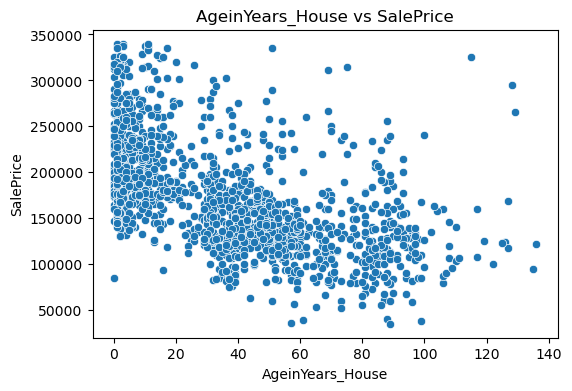

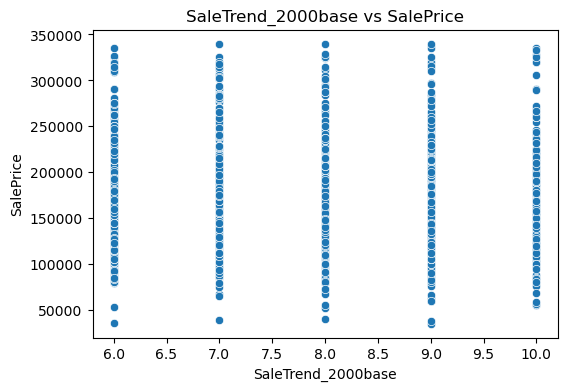

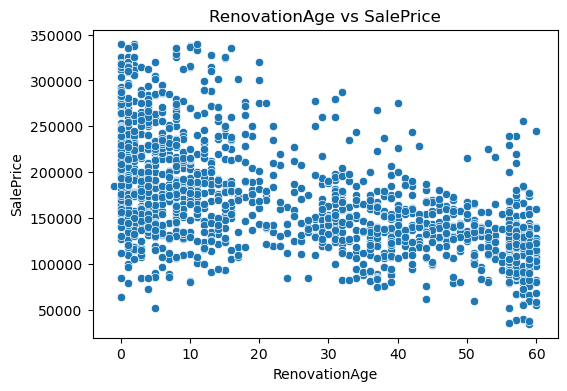

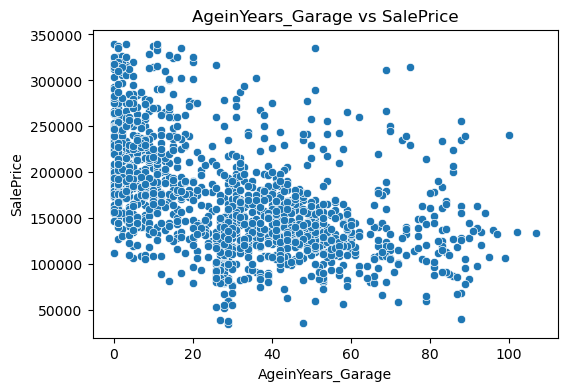

In [35]:
cols_to_plot = ['AgeinYears_House', 'SaleTrend_2000base', 'RenovationAge','AgeinYears_Garage'] 

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

- We can se that **age of house** as it increases the prices remain in the lower end, while the higher prices houses have less age
- time has no significant impact on houses- **SaleTrend** shows equal number of data points in the categories, but in 10 category (10 years since 2000) the houses are priced lower as compared to others
- Recent **Renovation** has significant impact on price, the older the renovation/remodelling done the prices are lower for them.
- **Garage Age** also has significant impact that, recent made garages might have more facilties than older constructed ones and so have raised house price.

### Encoding categorical variables

In [36]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create dummy variables (convert to numeric 0/1)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

df_encoded.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,AgeinYears_House,SaleTrend_2000base,RenovationAge,AgeinYears_Garage,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


verifying the dummies have encoded categorical variables successfully or not

In [37]:
df_model = df_encoded.copy()
df_model.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,AgeinYears_House,SaleTrend_2000base,RenovationAge,AgeinYears_Garage,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


### Log transformation of target variable

In [38]:
# checking skewness present in the variable
print(df_train['SalePrice'].skew())

# applying log to the variable
df_model['SalePrice'] = np.log1p(df_model['SalePrice'])
# checking skewness after transformation
print(df_model['SalePrice'].skew())

1.8828757597682129
-0.33257494064257526


**Visualizing the before and after transformation**

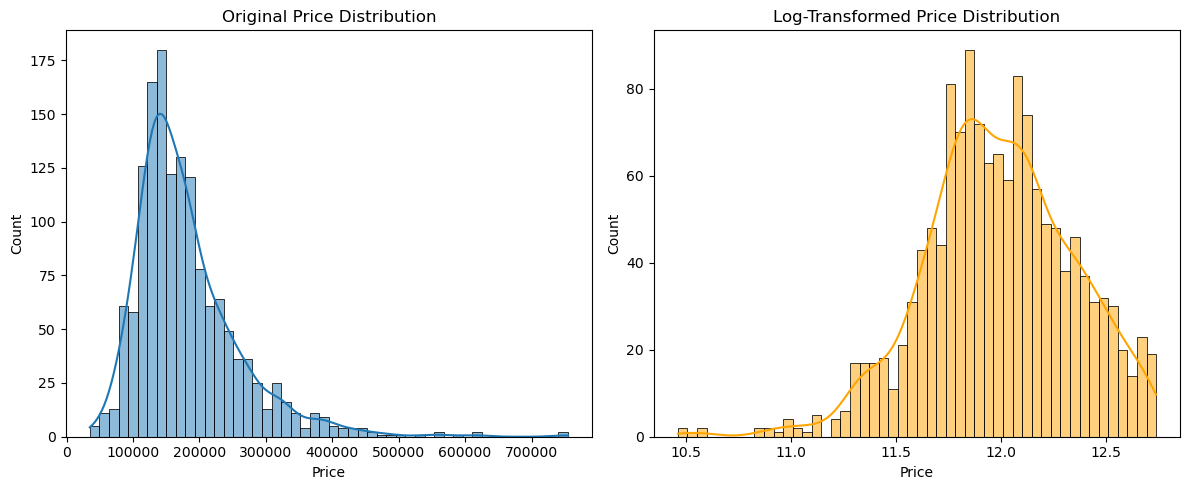

In [39]:
plt.figure(figsize=(12, 5))

# Original Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], bins=50, kde=True)
plt.title('Original Price Distribution')
plt.xlabel('Price')

# Log-Transformed Price Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_model['SalePrice'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

## Modelling

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

In [41]:
# splitting the data into X and Y variables
X = df_model.drop('SalePrice', axis=1)
y = df_model['SalePrice']

#splitting the dataset in 80 % train and 20 % test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# applying scaling to the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regression Model

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))
reg.score(X_train, y_train)

0.3556152751800069


0.940129147279605

<h4 style='color:indigo'>Normal Regression is clearly overfitting the data, let's try other models</h4>

Ridge Regression

In [43]:
# Ridge Regression (L2)
ridge = Ridge(alpha=1.0)   # alpha = λ (regularization strength)
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Evaluation
print("Ridge R2 score:", r2_score(y_test, y_pred))

ridge_coefficients = pd.Series(
    ridge.coef_,
    index=X.columns
)

print(ridge_coefficients.sort_values(ascending=False))

Ridge R2 score: 0.8803370953131473
Condition2_PosA          0.268898
OverallQual_9            0.248717
RoofMatl_CompShg         0.205975
MSZoning_FV              0.205121
MSZoning_RH              0.191435
RoofMatl_WdShngl         0.184749
MSZoning_RL              0.183955
OverallQual_8            0.175808
RoofMatl_Tar&Grv         0.149012
MSZoning_RM              0.141920
RoofMatl_WdShake         0.127617
OverallQual_7            0.124644
Exterior1st_BrkFace      0.117267
Street_Pave              0.101439
Neighborhood_NridgHt     0.101300
SaleCondition_Partial    0.096352
Neighborhood_StoneBr     0.091127
SaleCondition_AdjLand    0.090743
OverallCond_9            0.086586
HouseStyle_2.5Unf        0.085278
OverallQual_6            0.084355
SaleCondition_Normal     0.084122
SaleType_ConLD           0.083446
Condition1_PosA          0.083207
CentralAir_Y             0.082188
MSSubClass_70            0.078319
Heating_Wall             0.077570
Neighborhood_Somerst     0.076002
HouseStyle_1.

Ridge R2 score: 0.8803370953131473 shows that Ridge Regression is able to perform better than normal regression

**Lasso Regression**

In [53]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

print(lasso_reg.score(X_train, y_train))
print(lasso_reg.score(X_test, y_test))

# Predictions
y_pred = lasso.predict(X_test)

# Evaluation
print("Lasso R2 score:", r2_score(y_test, y_pred))

0.3578967582206395
0.3731904181545548
Lasso R2 score: 0.7870314155772675


Lasso Regression is performing better than normal regression but worse than Ridge.  
This is because some variable that interact with each other is able to explain the price change in houses in Ridge while Lasso turns these less significant variables to zero turning their interaction to zero.

In [45]:
non_zero_idx = np.where(lasso.coef_ != 0) # prints only those coeffecients that are not zero

for idx in non_zero_idx[0]:
    print(X.columns[idx], lasso.coef_[idx])

LotArea 1.5845229801925685e-06
MasVnrArea -1.768919055673298e-05
BsmtFinSF1 1.3144592812993982e-05
BsmtUnfSF -1.0919876463485181e-05
TotalBsmtSF 0.00012349995422704198
1stFlrSF 0.00012416448480388403
2ndFlrSF 0.00015087157359073417
GrLivArea 0.000144394680980156
GarageArea 0.0003089373881221253
WoodDeckSF 0.00022046513314353996
OpenPorchSF 1.224224523711296e-05
EnclosedPorch 0.00016995099321493324
ScreenPorch 0.0005269519333906558
AgeinYears_House -0.0036967417260408437
RenovationAge -0.0035163270409538563
AgeinYears_Garage 0.0009494514860447975
